# Import packages and dataframes

In [69]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from anndata import AnnData, read_h5ad
import scanpy.external as sce
import scipy
import scvelo as scv

#scv.settings.verbosity = 3 # show errors(0), warnings(1), info(2), hints(3)
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

#scv.settings.presenter_view = True  # set max width size for presenter view
#scv.set_figure_params('scvelo')  # for beautified visualization
sc.set_figure_params(dpi=100, color_map = 'viridis')

scanpy==1.6.0 anndata==0.7.5 umap==0.4.6 numpy==1.19.4 scipy==1.6.0 pandas==1.2.0 scikit-learn==0.24.0 statsmodels==0.12.1 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [2]:
pathToData = '/Users/m.blotenburg/Documents/Projects/TCHIC/data/rep2/20210215_OUD5651_K27me3K4me3_day5_20201023fixed/'

Import and check adata file, to see if all layers are present

In [3]:
adata = sc.read(pathToData + '/dataframes/20210304_TCHIC_rep2_adata_trans_chic.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 4396 × 27312
    obs: 'n_counts', 'n_genes', 'percent_mito', 'batch', 'day', 'replicates', 'mark', 'umap_density_mark', 'leiden', 'louvain', 'celltype', 'cellnames', 'bc', 'cellname'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'celltype_colors', 'day_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'louvain', 'louvain_colors', 'mark_colors', 'neighbors', 'pca', 'rank_genes_groups', 'replicates_colors', 'umap', 'umap_density_mark_params'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'k27_raw', 'k4_raw', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

# Plots

Now we can make all sorts of plots with these layers. Generally, if you want to plot specifically spliced, unspliced, k4me3, k27me3 or any other histone mark/additional layer, you can specify this by saying "layer = x" (where x = name of layer, e.g. 'spliced' or 'k4_raw'). <br/>
Change default settings for plots, e.g. fontsize

In [5]:
sc.set_figure_params(scanpy=True, fontsize=20)

Example: "regular" plots of layers on top of UMAP

In [6]:
layers = ['unspliced','spliced','k4_raw','k27_raw']

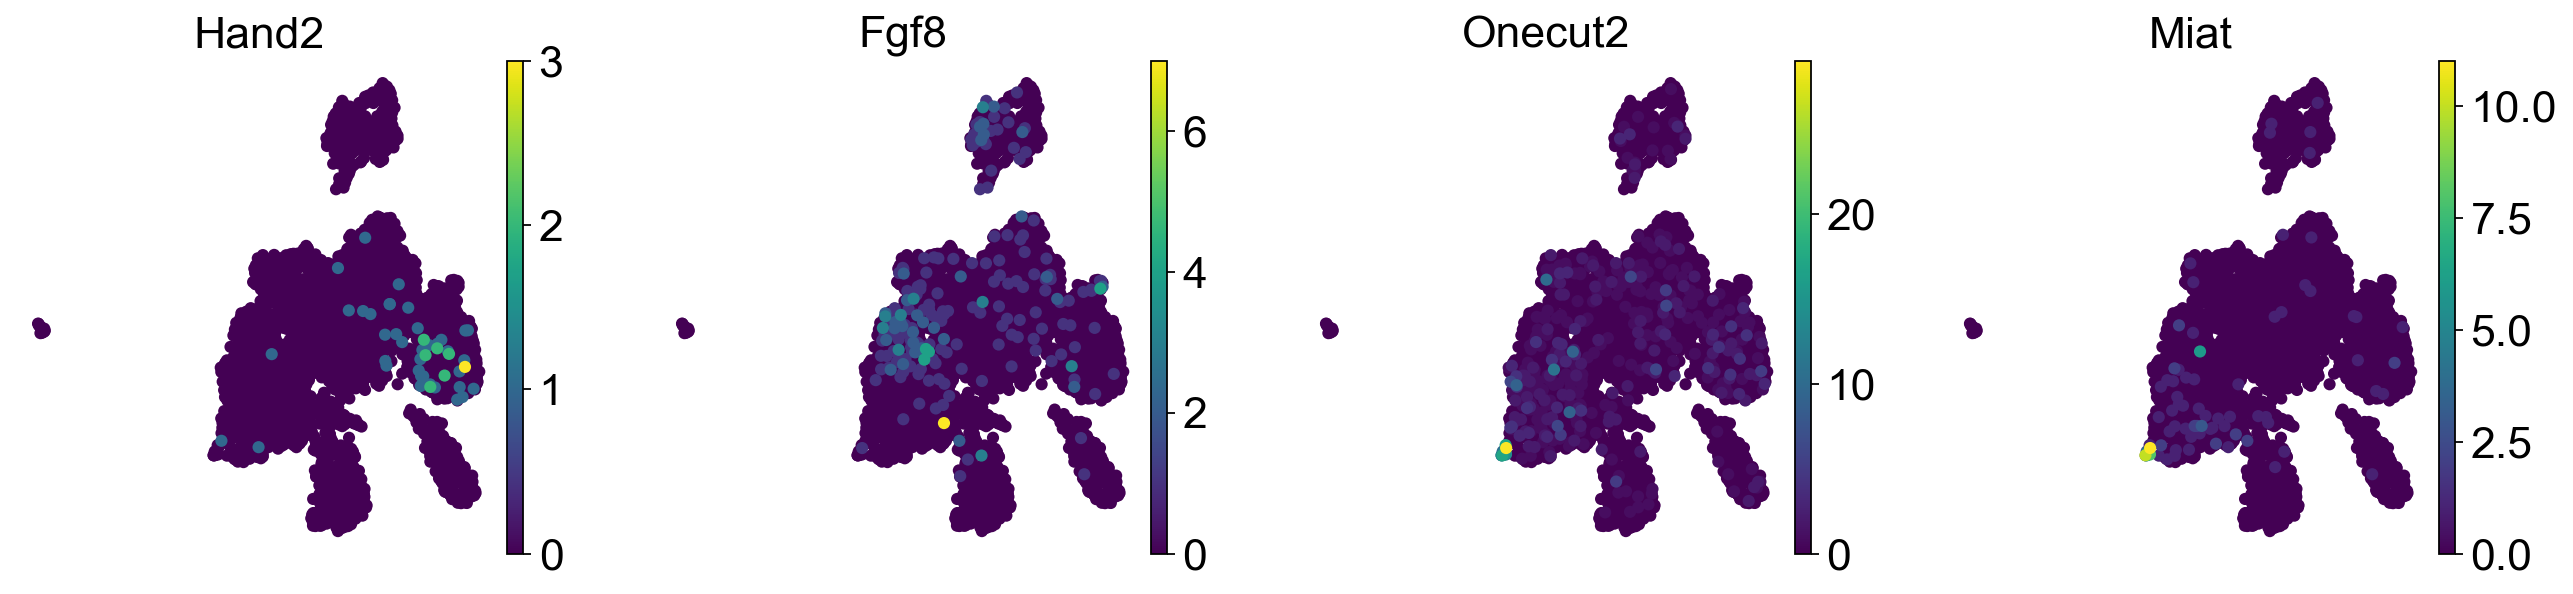

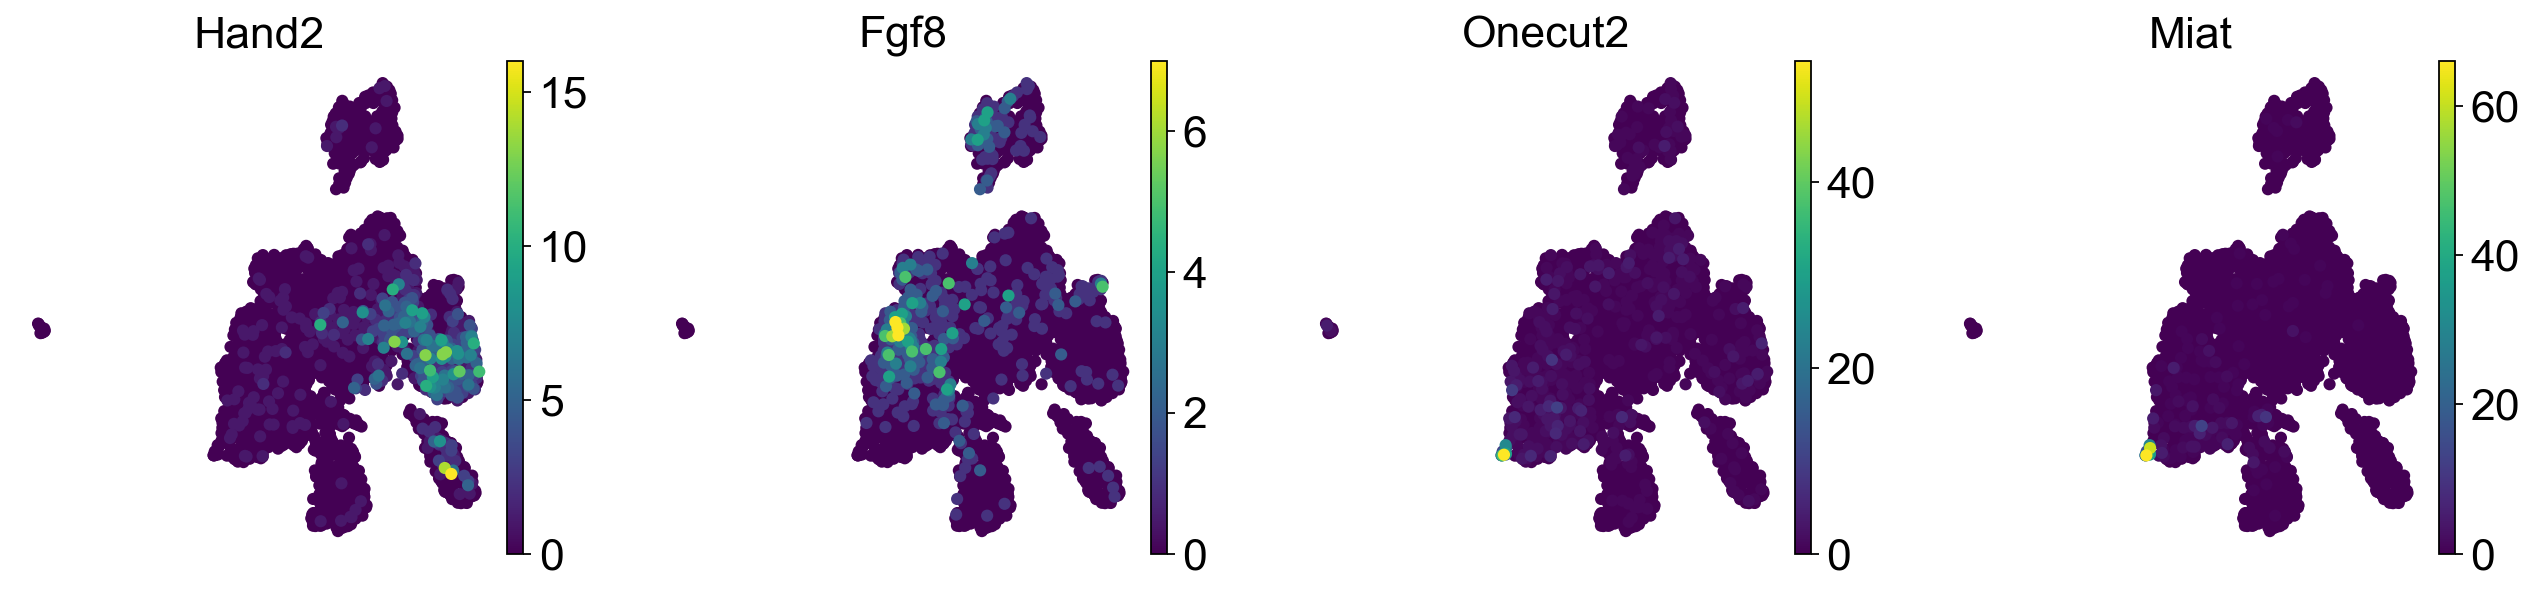

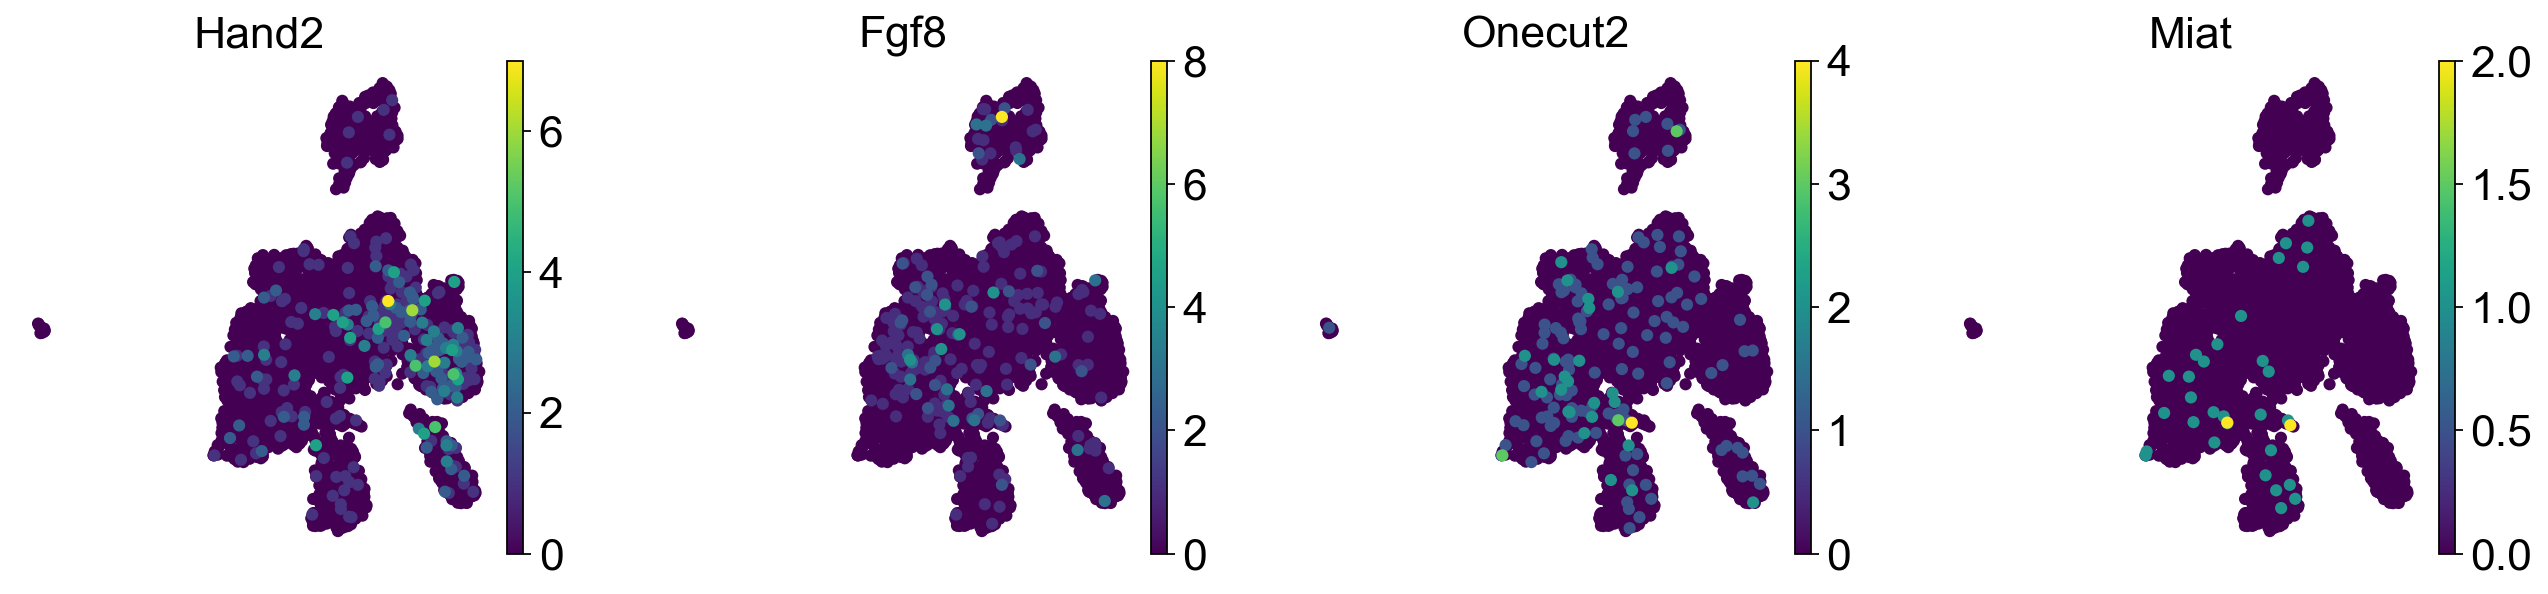

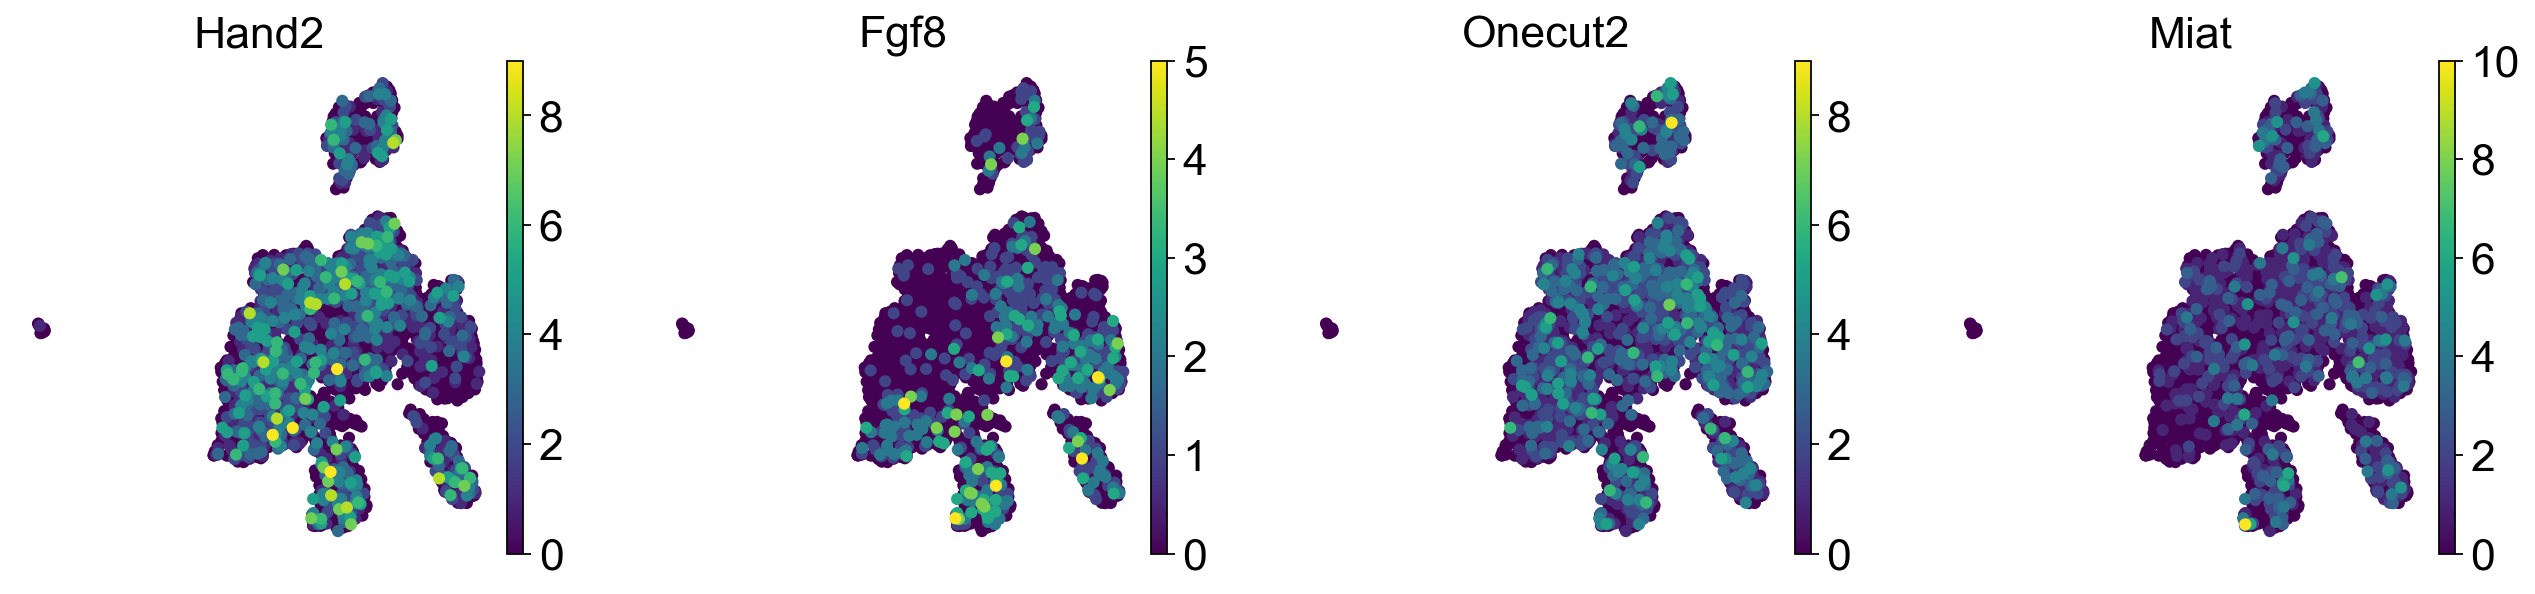

In [7]:
for layer in layers:
    sc.pl.umap(adata,color=["Hand2","Fgf8", "Onecut2","Miat"], size = 120,layer=layer, frameon=False)
    


We can also make dot plots or violin plots

In [8]:
hox = adata.var.filter(regex=r'Hox', axis=0).index

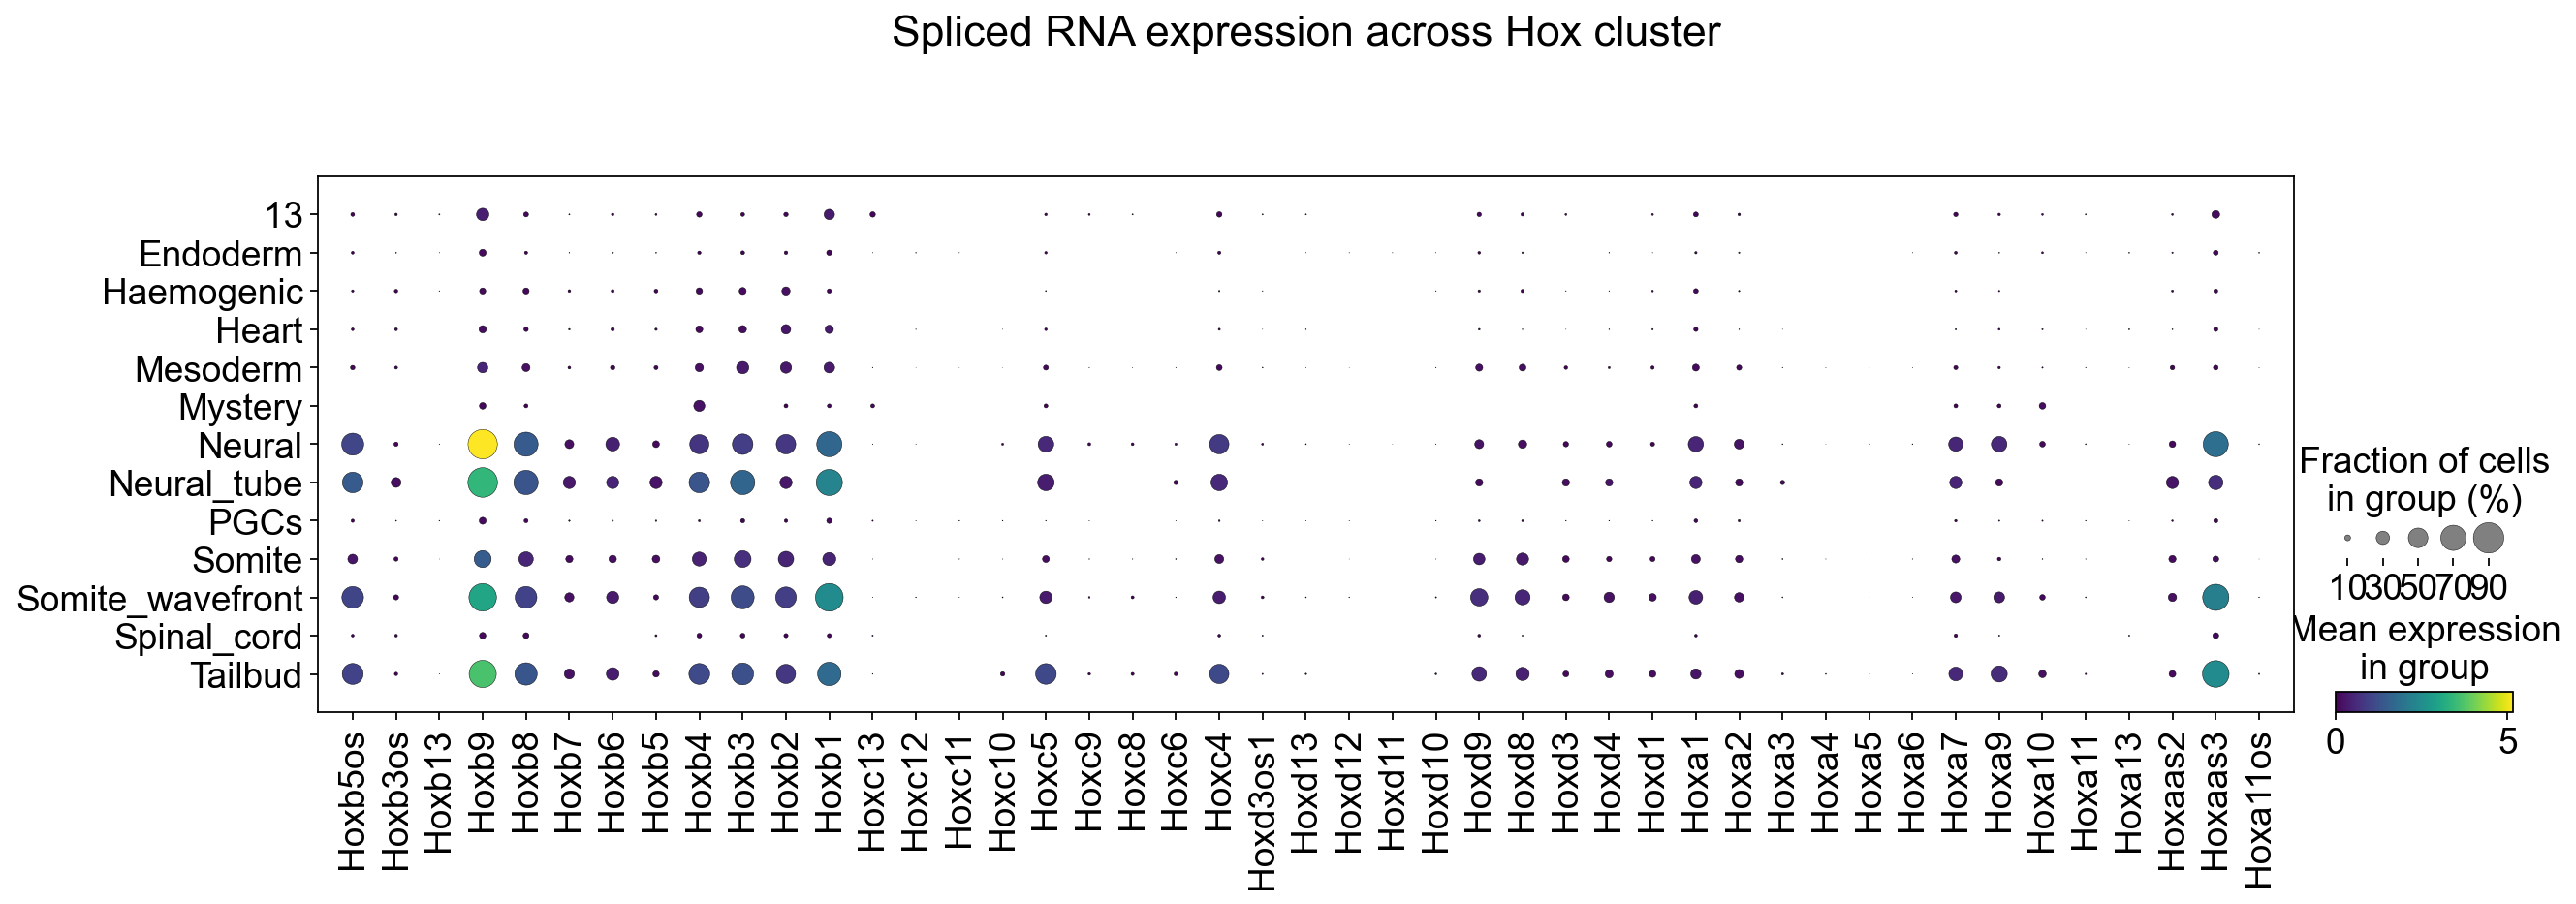

In [9]:
ax = sc.pl.dotplot(adata, hox,groupby='celltype', cmap="viridis", 
                   title = 'Spliced RNA expression across Hox cluster', layer='spliced') 
# ,save='dotplot_markergenes.png')

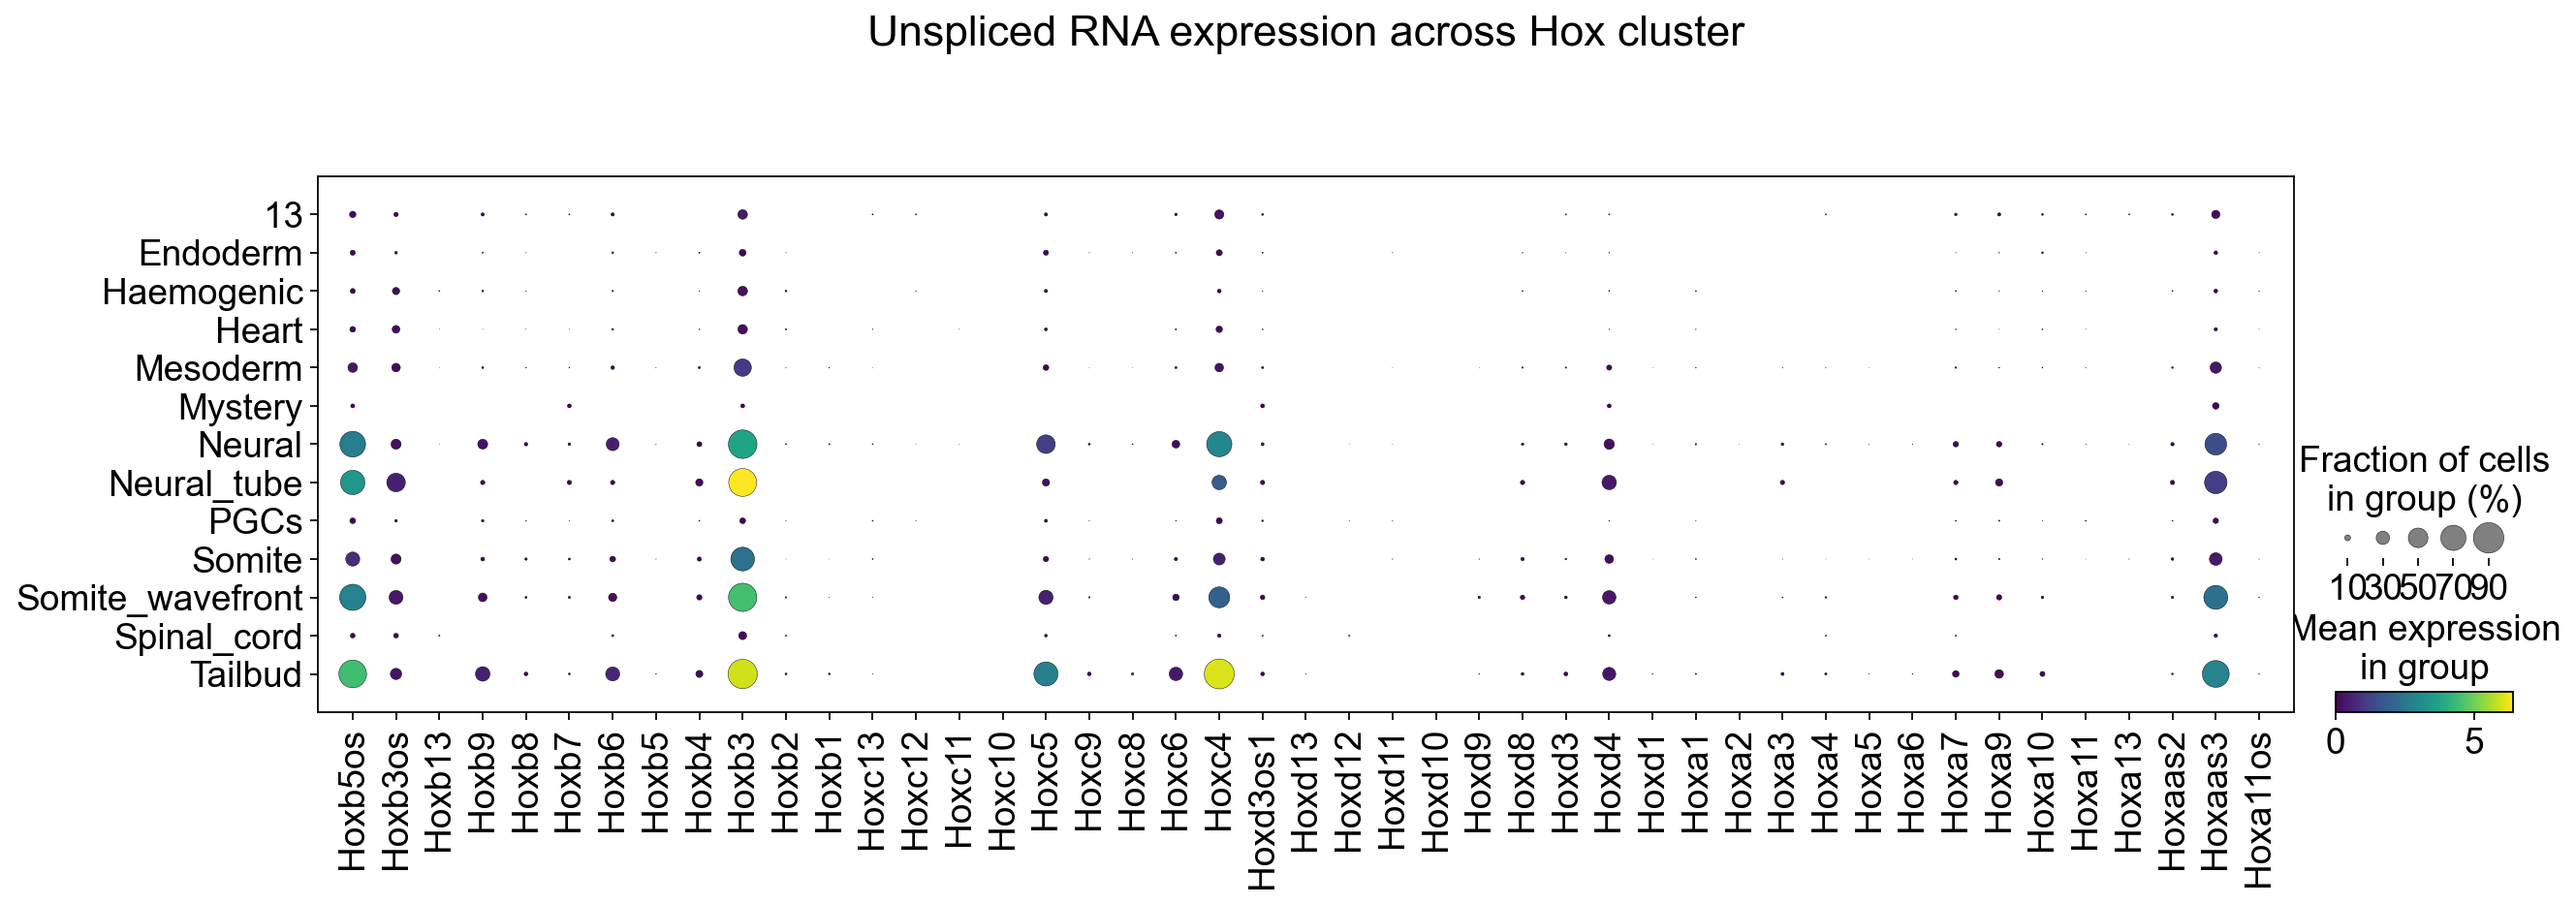

In [10]:
ax = sc.pl.dotplot(adata, hox, groupby='celltype', cmap="viridis",
                   layer='unspliced', title = 'Unspliced RNA expression across Hox cluster',
                   log=False) # ,save='dotplot_markergenes.png')

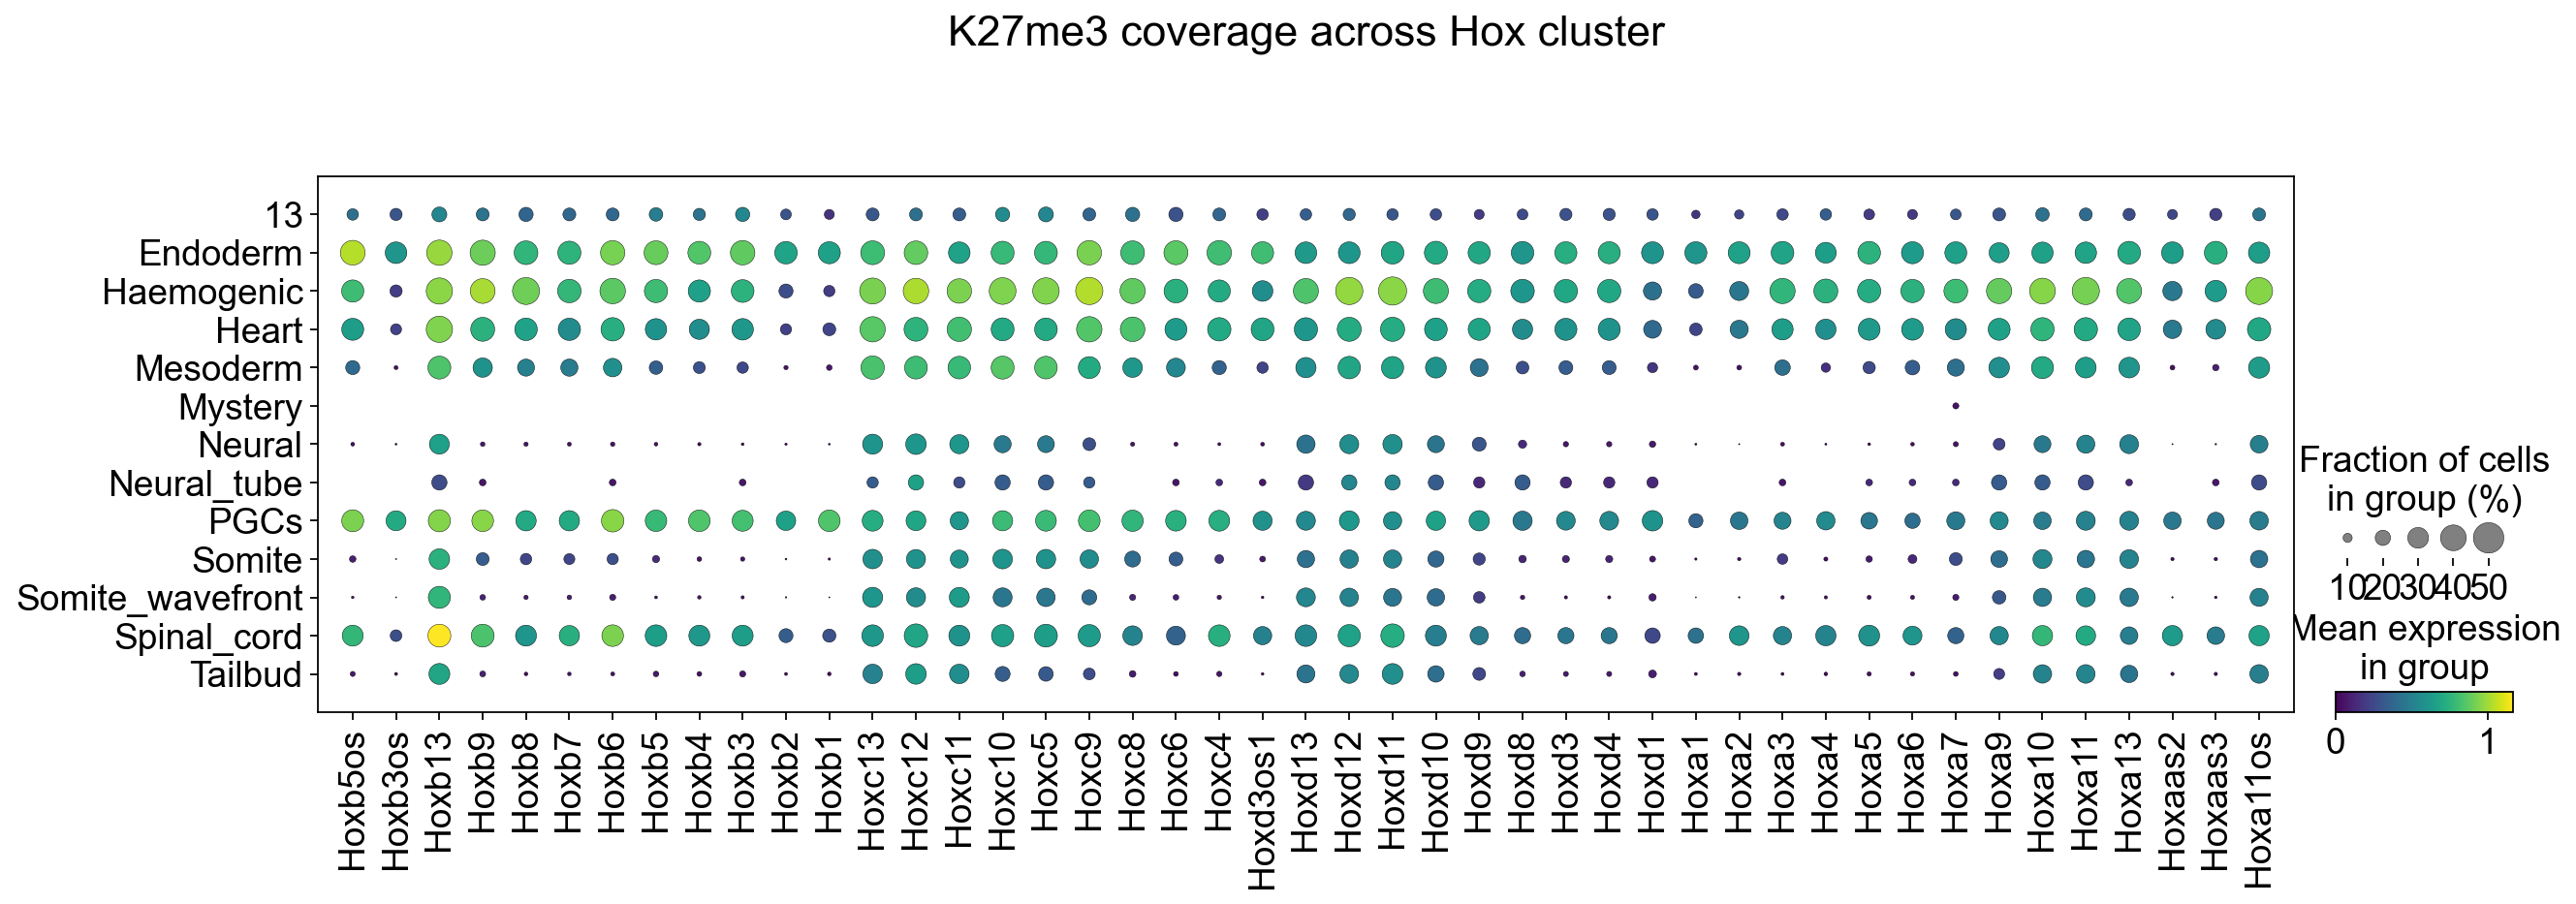

In [11]:
ax = sc.pl.dotplot(adata, hox, groupby='celltype', cmap = "viridis",
                   layer='k27_raw', title = 'K27me3 coverage across Hox cluster') 
# ,save='dotplot_markergenes.png')

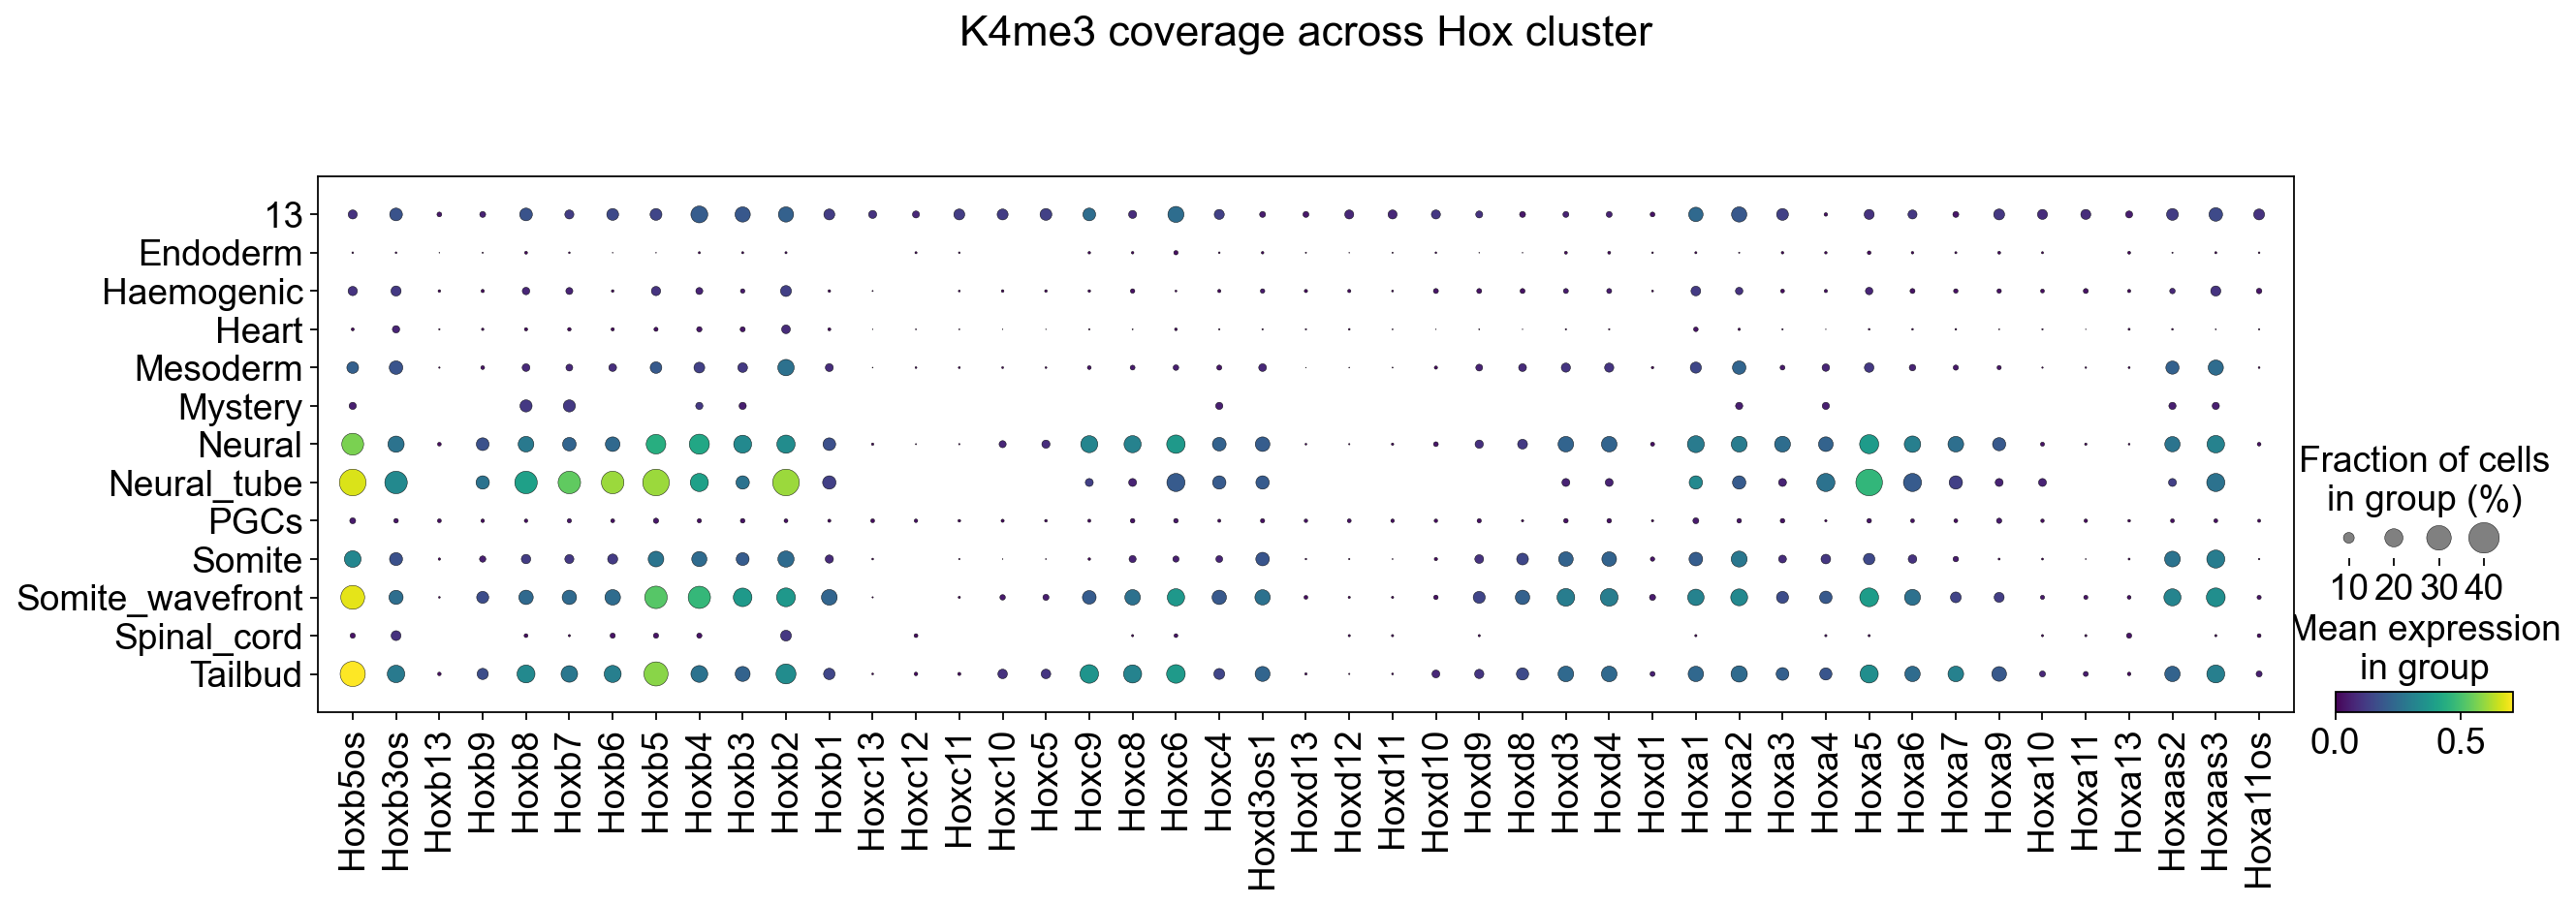

In [12]:
ax = sc.pl.dotplot(adata, hox, groupby='celltype', cmap = 'viridis',
                   layer='k4_raw', title = 'K4me3 coverage across Hox cluster'
                   ,log=False) # ,save='dotplot_markergenes.png')

In case you want to add a dendogram:

In [13]:
sc.tl.dendrogram(adata, groupby="celltype")

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns["dendrogram_['celltype']"]`


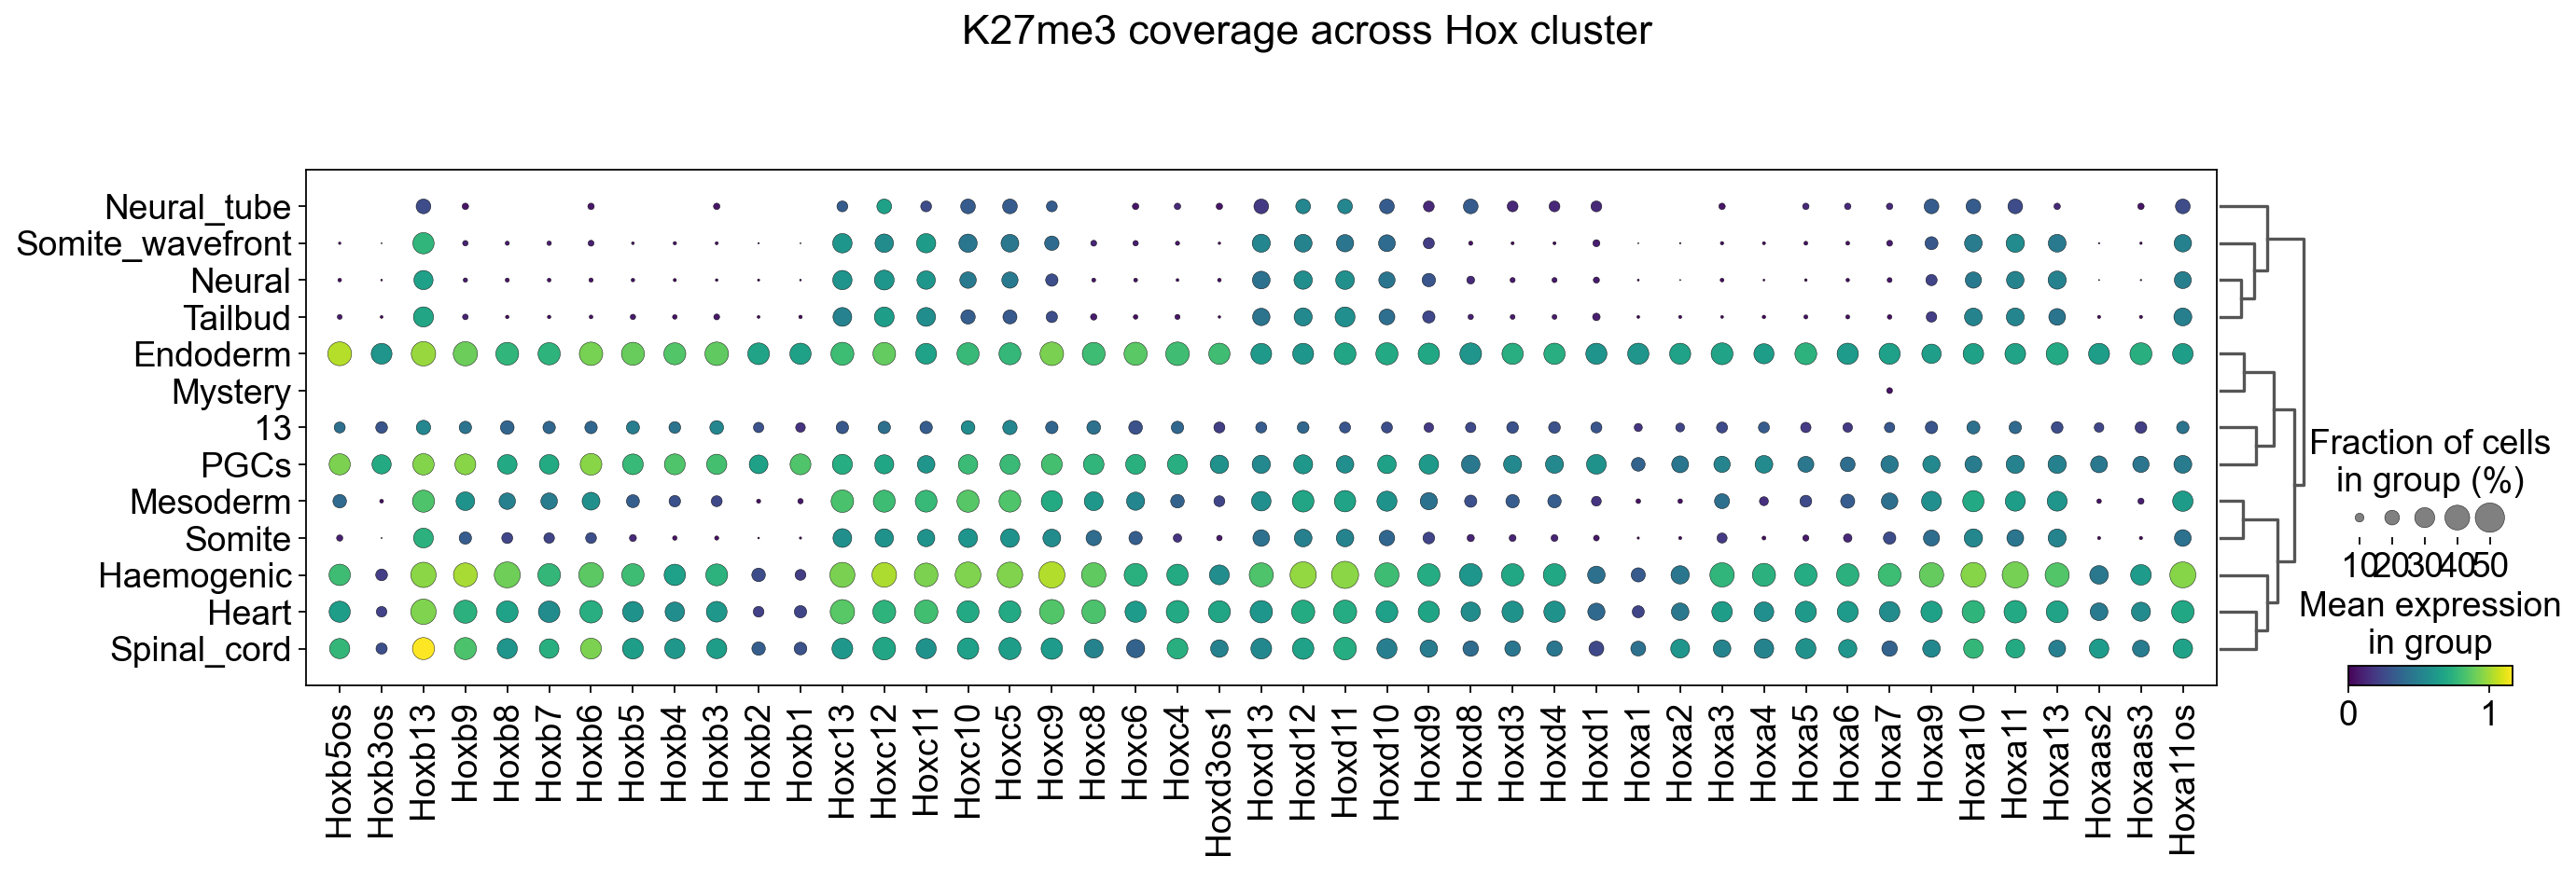

In [14]:
ax = sc.pl.dotplot(adata, hox, groupby='celltype', cmap = 'viridis', dendrogram = True,
                   layer='k27_raw', title = 'K27me3 coverage across Hox cluster'
                   ,log=False) # ,save='dotplot_markergenes.png')

Or make a violin plot

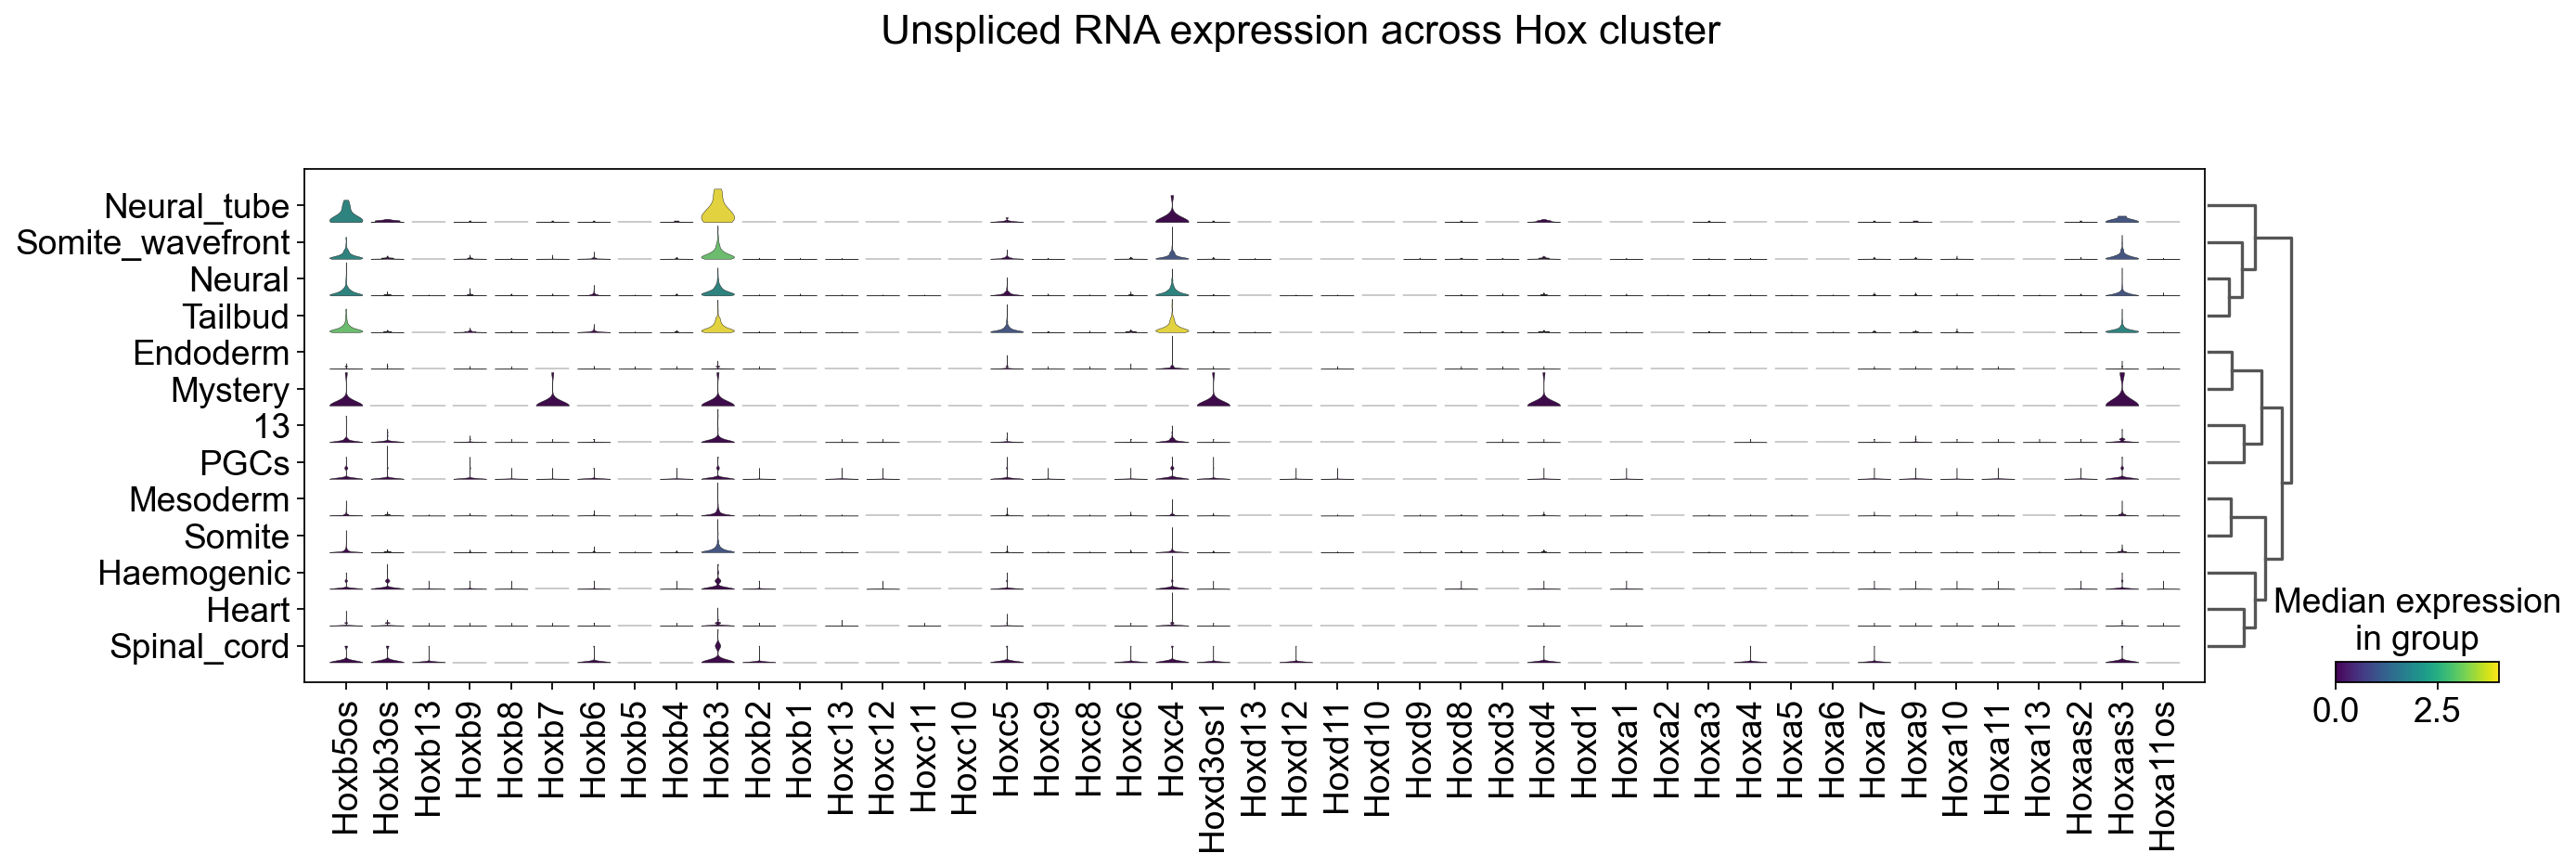

In [15]:
ax = sc.pl.stacked_violin(adata, hox, groupby='celltype', swap_axes=False, 
                          dendrogram=True, cmap='viridis', layer = 'unspliced', 
                          title = 'Unspliced RNA expression across Hox cluster' )

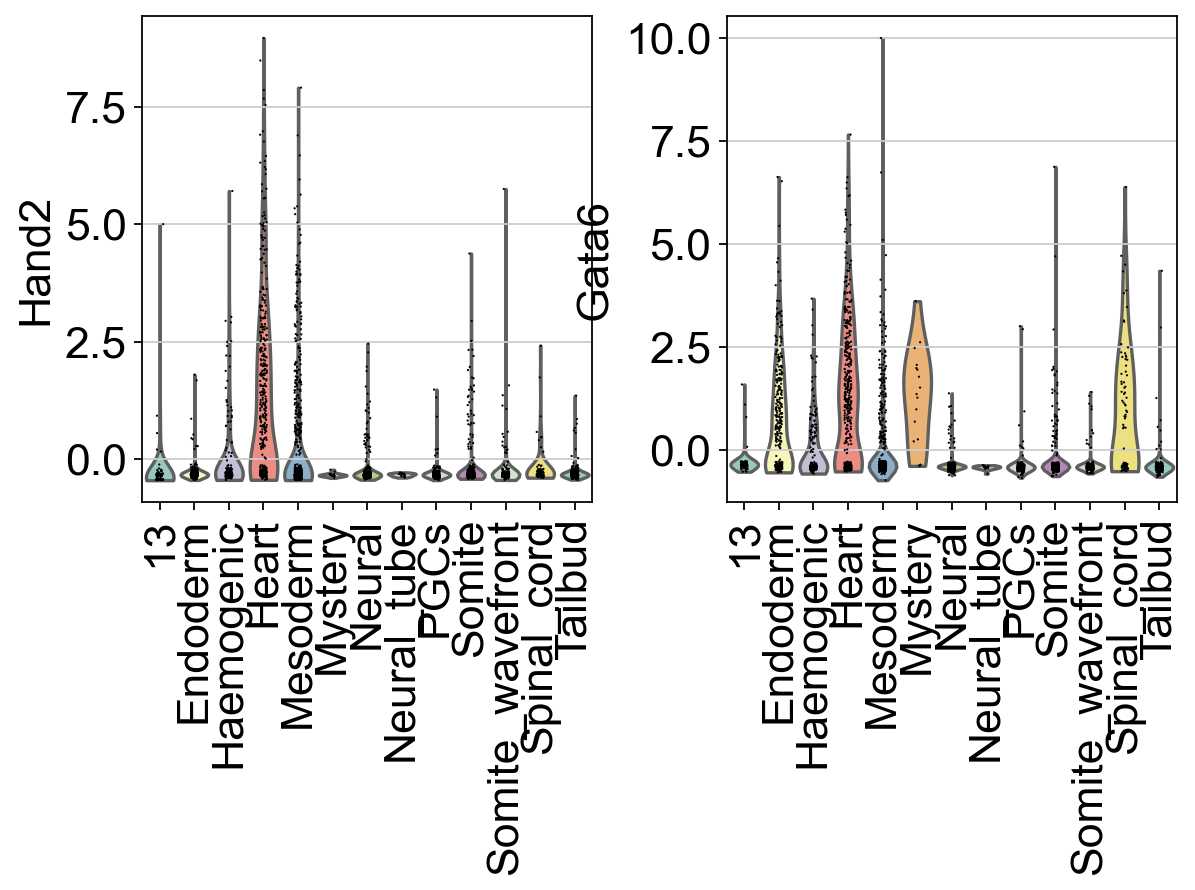

In [16]:
sc.pl.violin(adata, ['Hand2', 'Gata6'], groupby='celltype', use_raw=False, 
             rotation = 90)

Make all sorts of heatmaps

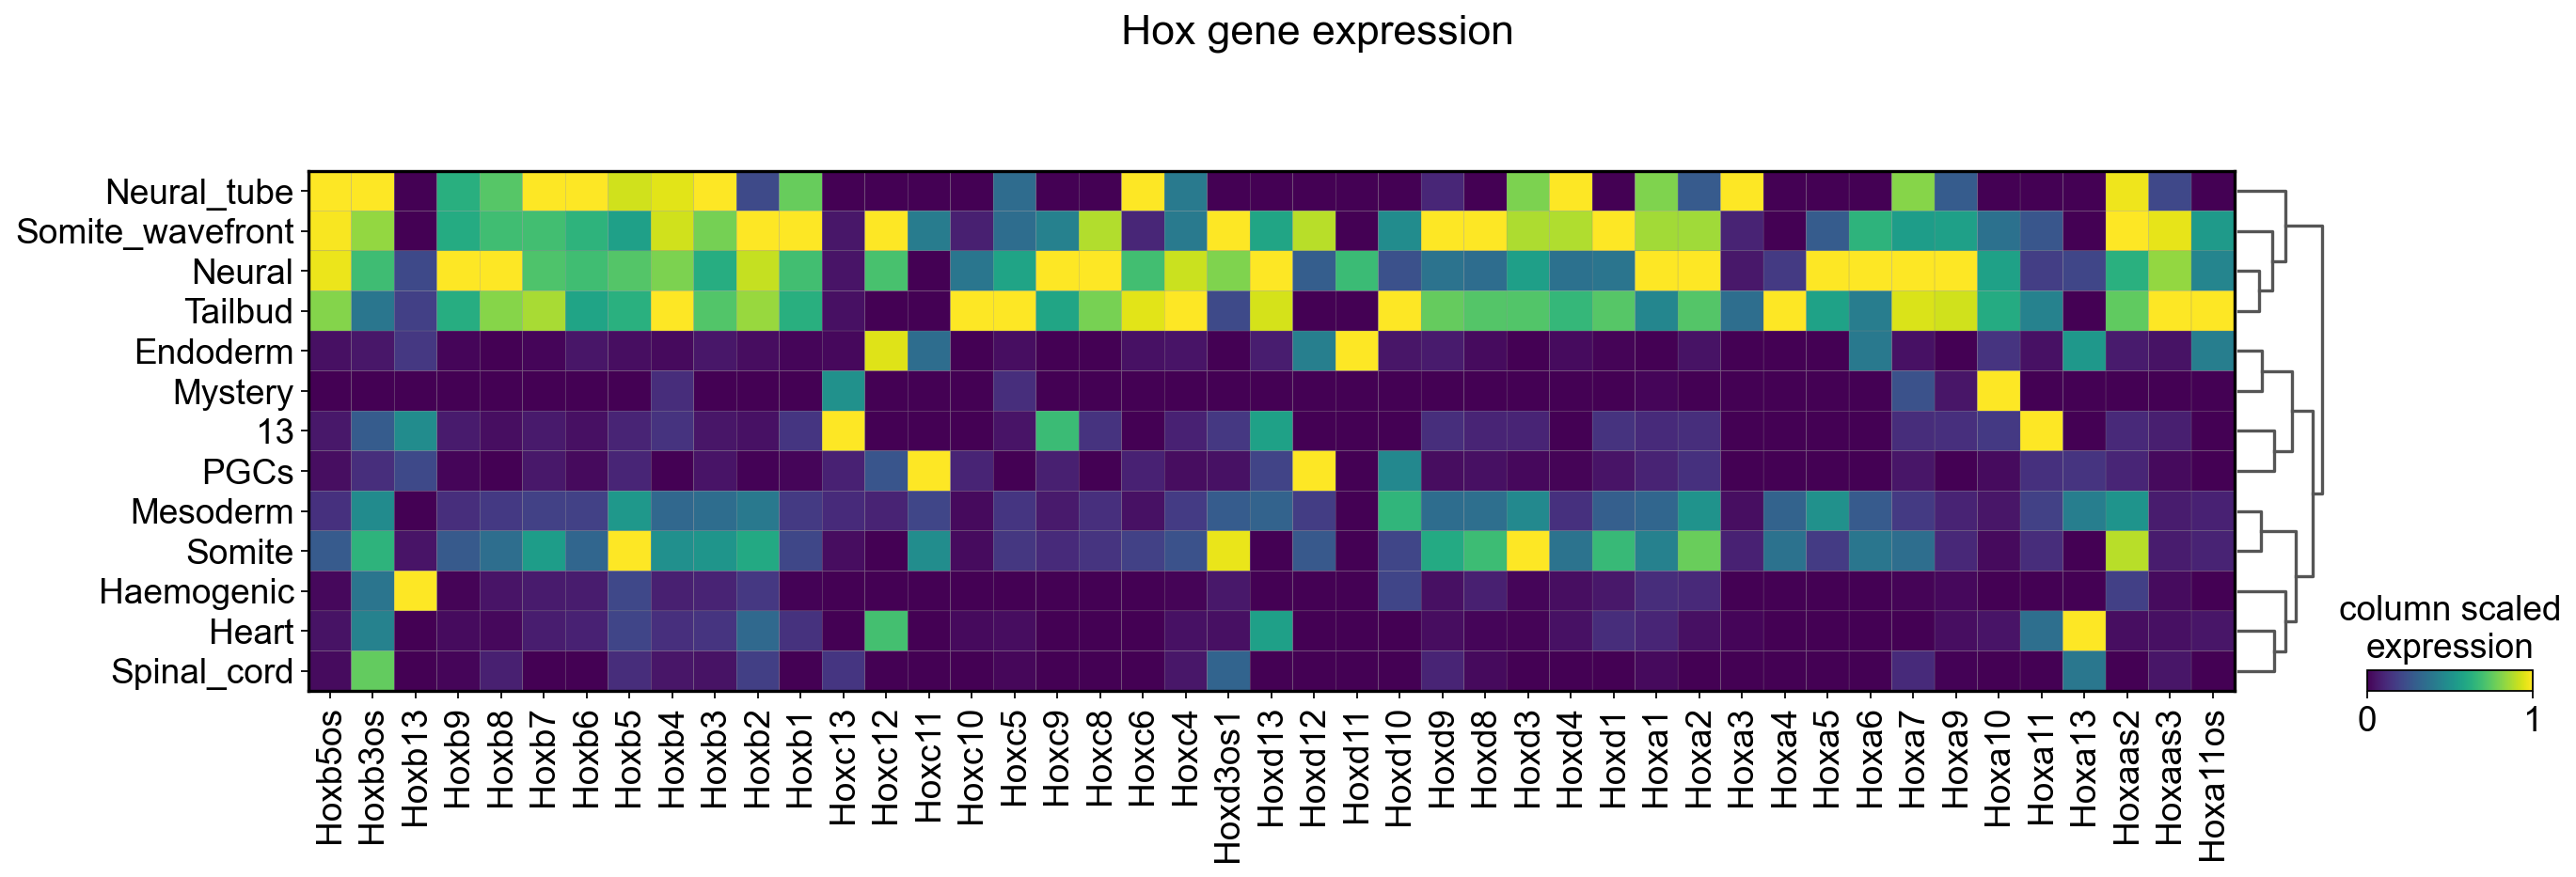

In [17]:
sc.pl.matrixplot(adata, hox, 'celltype', dendrogram=True, cmap='viridis', standard_scale='var',
                 colorbar_title='column scaled\nexpression', title = "Hox gene expression")

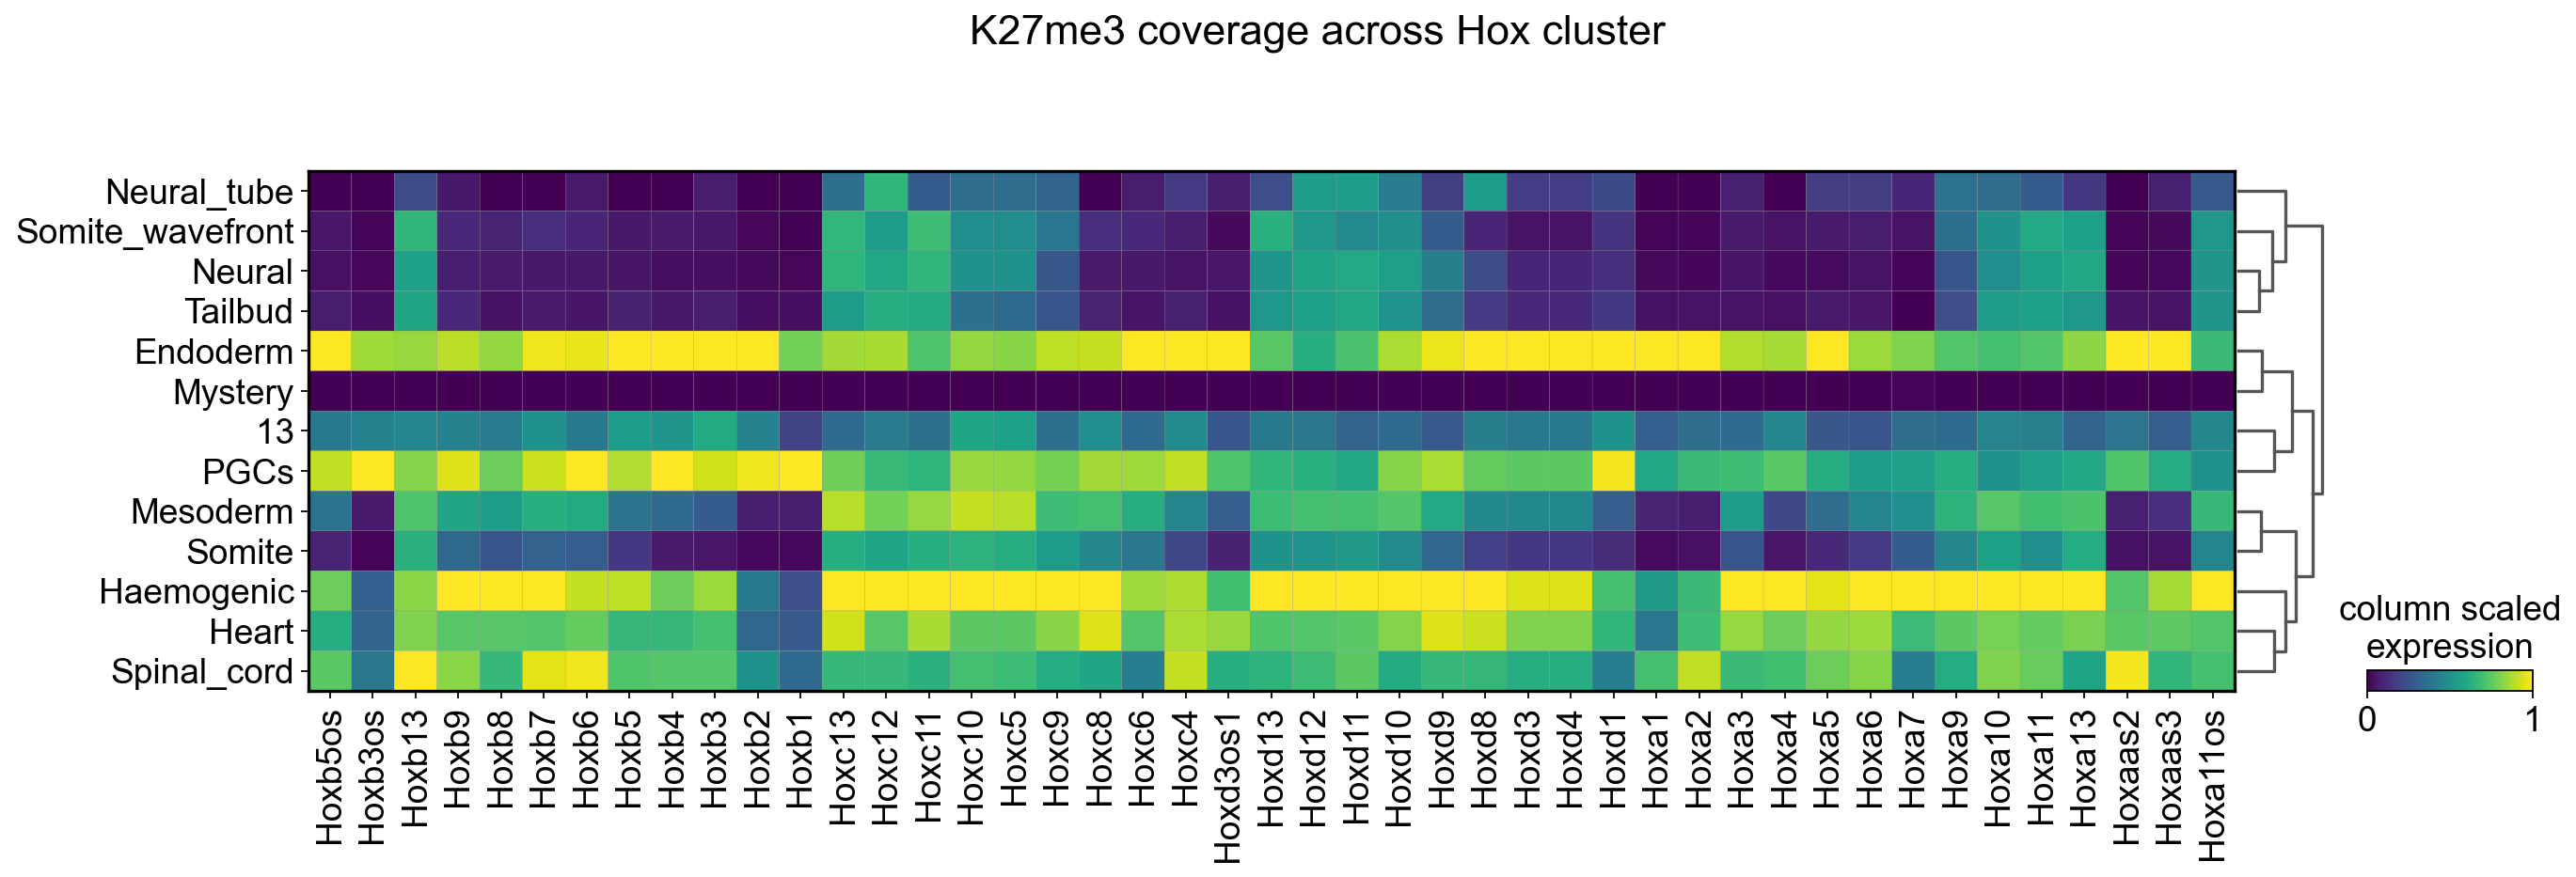

In [18]:
sc.pl.matrixplot(adata, hox, 'celltype', dendrogram=True, cmap='viridis', standard_scale='var',
                 layer = 'k27_raw',
                 colorbar_title='column scaled\nexpression', title = "K27me3 coverage across Hox cluster")

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_celltype']`


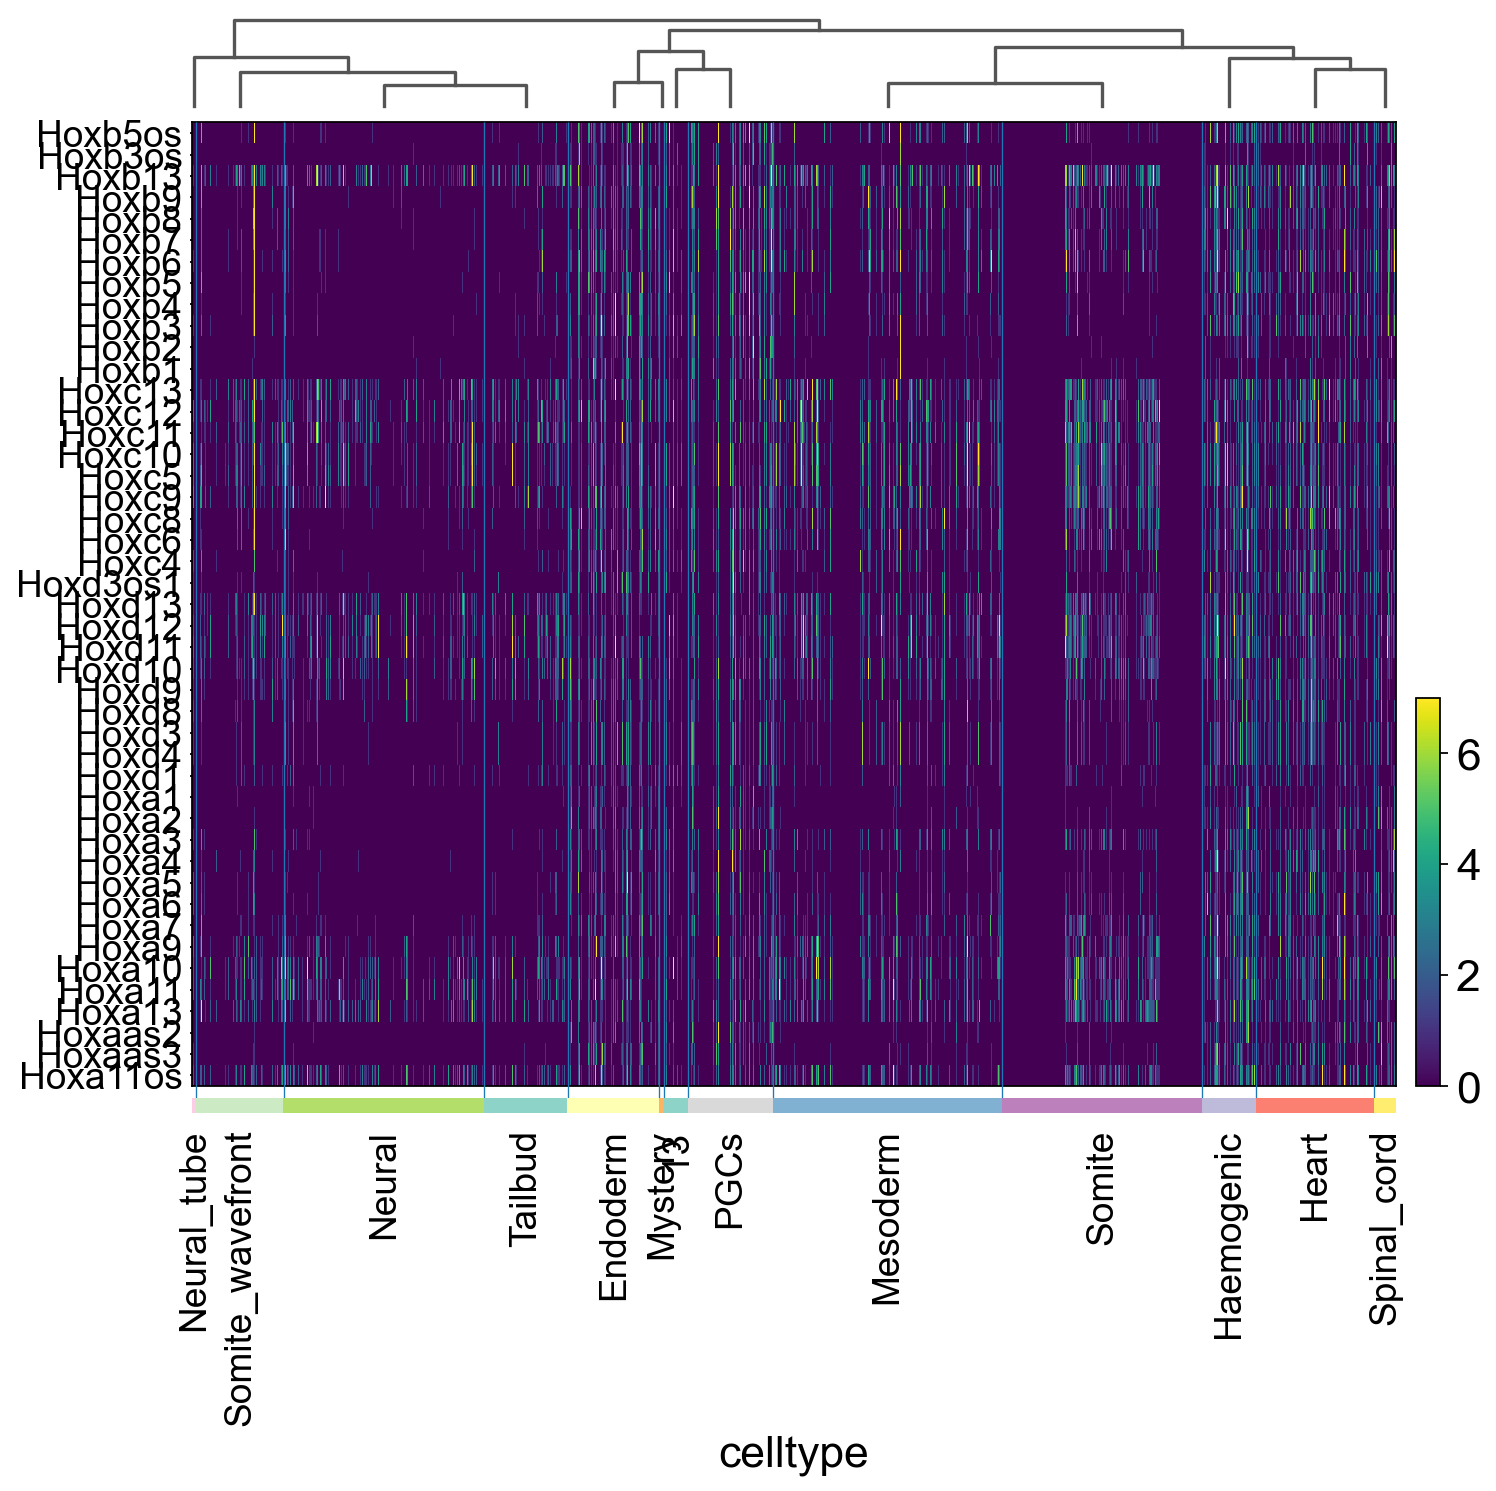

In [19]:
ax = sc.pl.heatmap(adata, hox, groupby='celltype', cmap='viridis', layer = 'k27_raw', vmax = 7,swap_axes=True,
                   dendrogram=True)

To make the matrix plots below, first run rank_genes_groups on the grouping you want to use for the plots. In this case, we use "celltype" but you could also use louvain or leiden clustering, timepoints and so on. By default, this uses transcriptome data. If you wish to rank differential genes for e.g. specifically spliced or unspliced, or for k27/k4 data, specify by adding the argument "layer = x"

In [47]:
sc.tl.rank_genes_groups(adata, 'celltype', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:11)


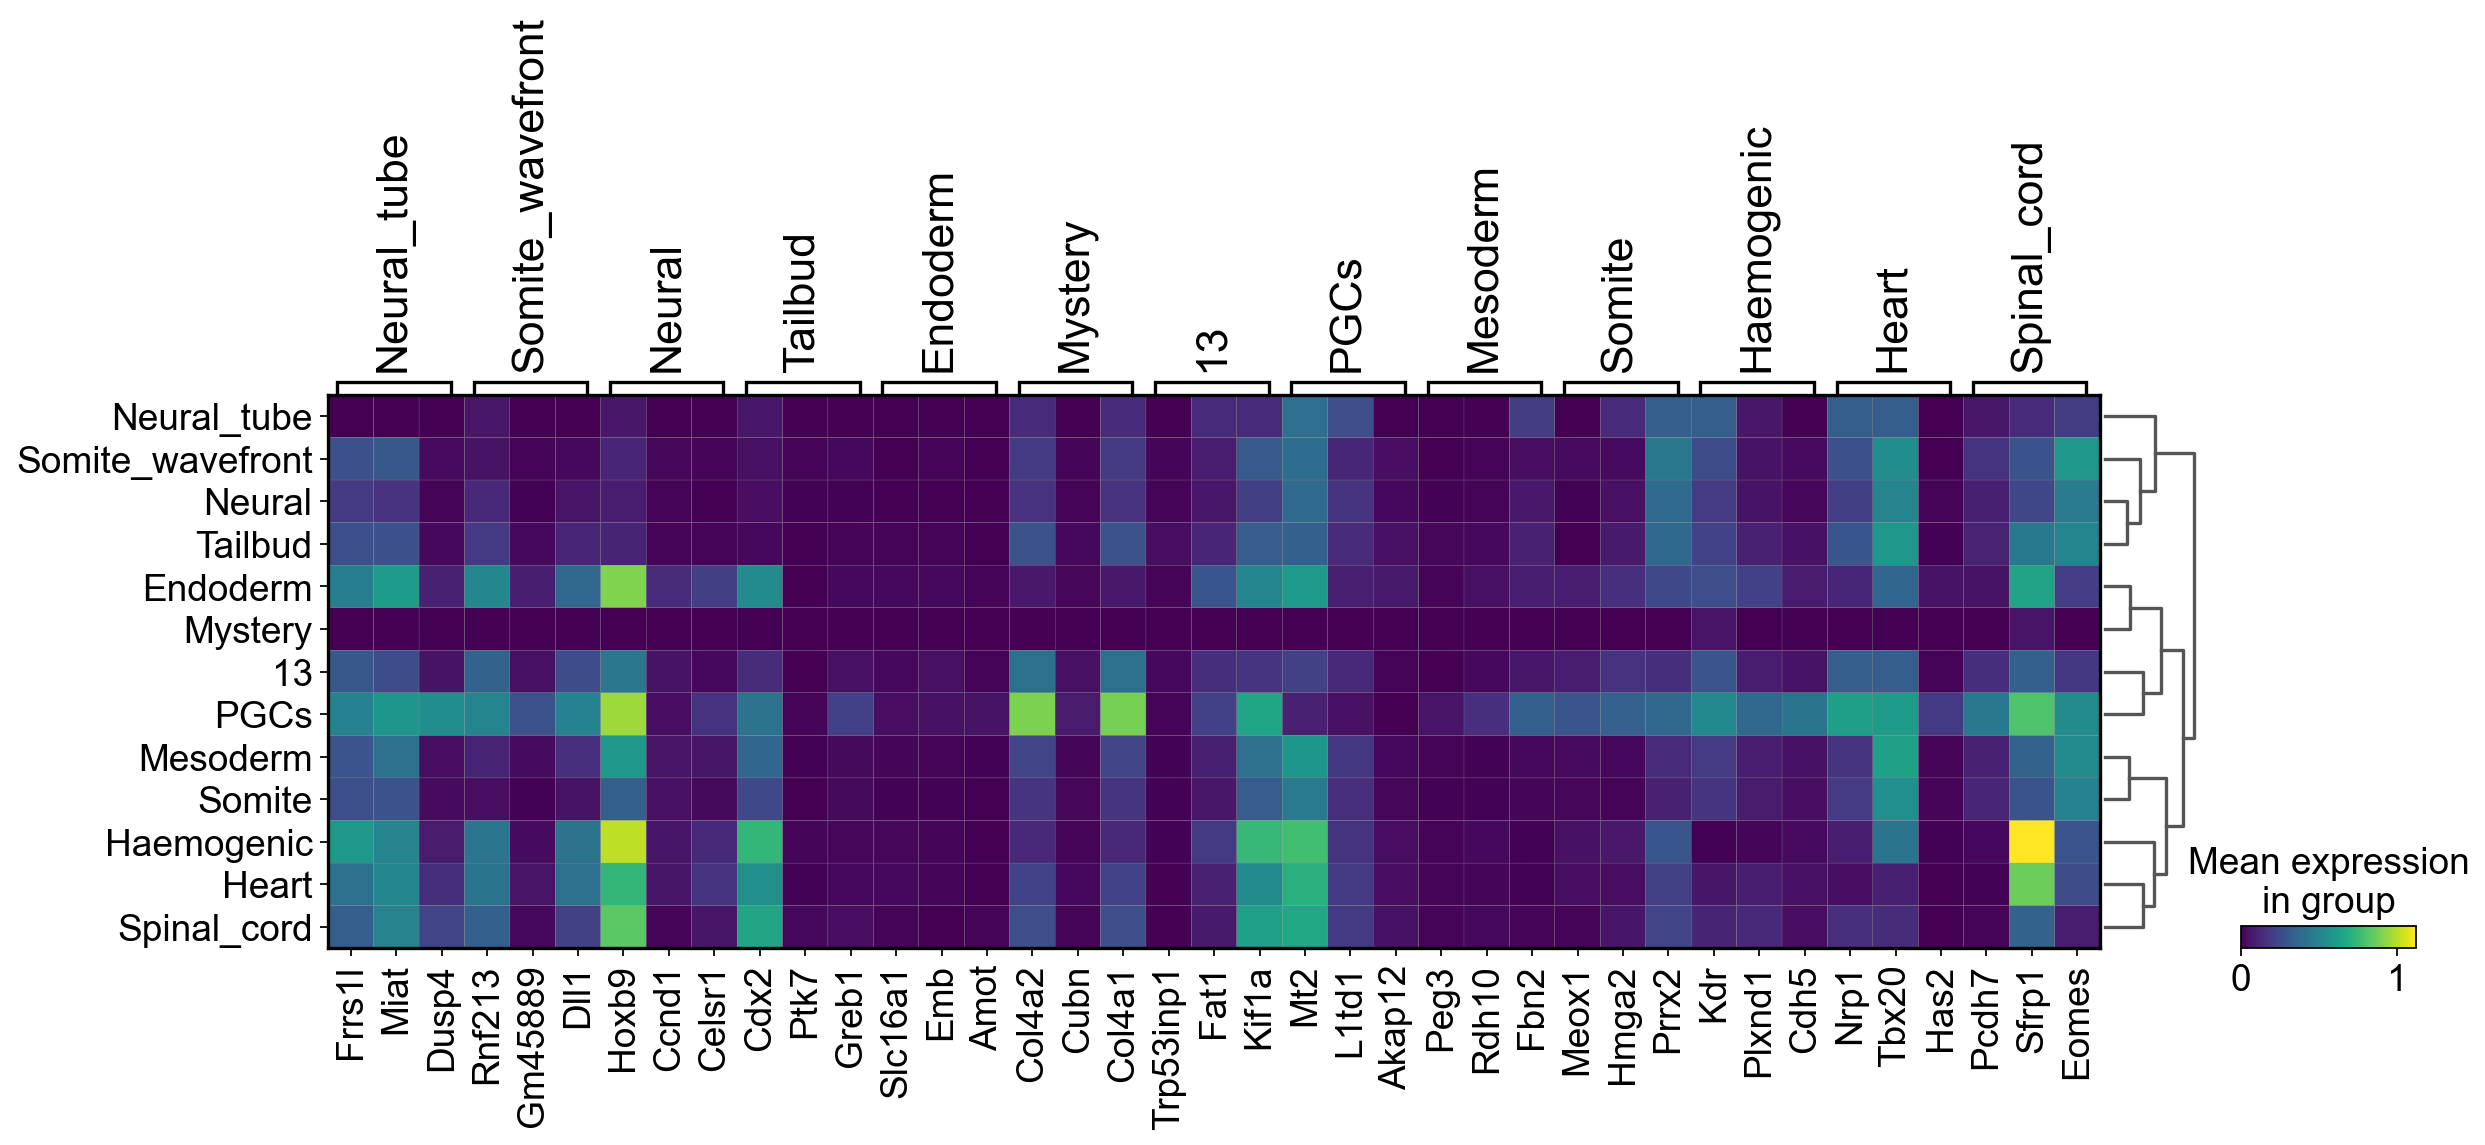

In [52]:
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=3, groupby="celltype",dendrogram=True,
                                  use_raw=False, cmap='viridis', layer = 'k27_raw')

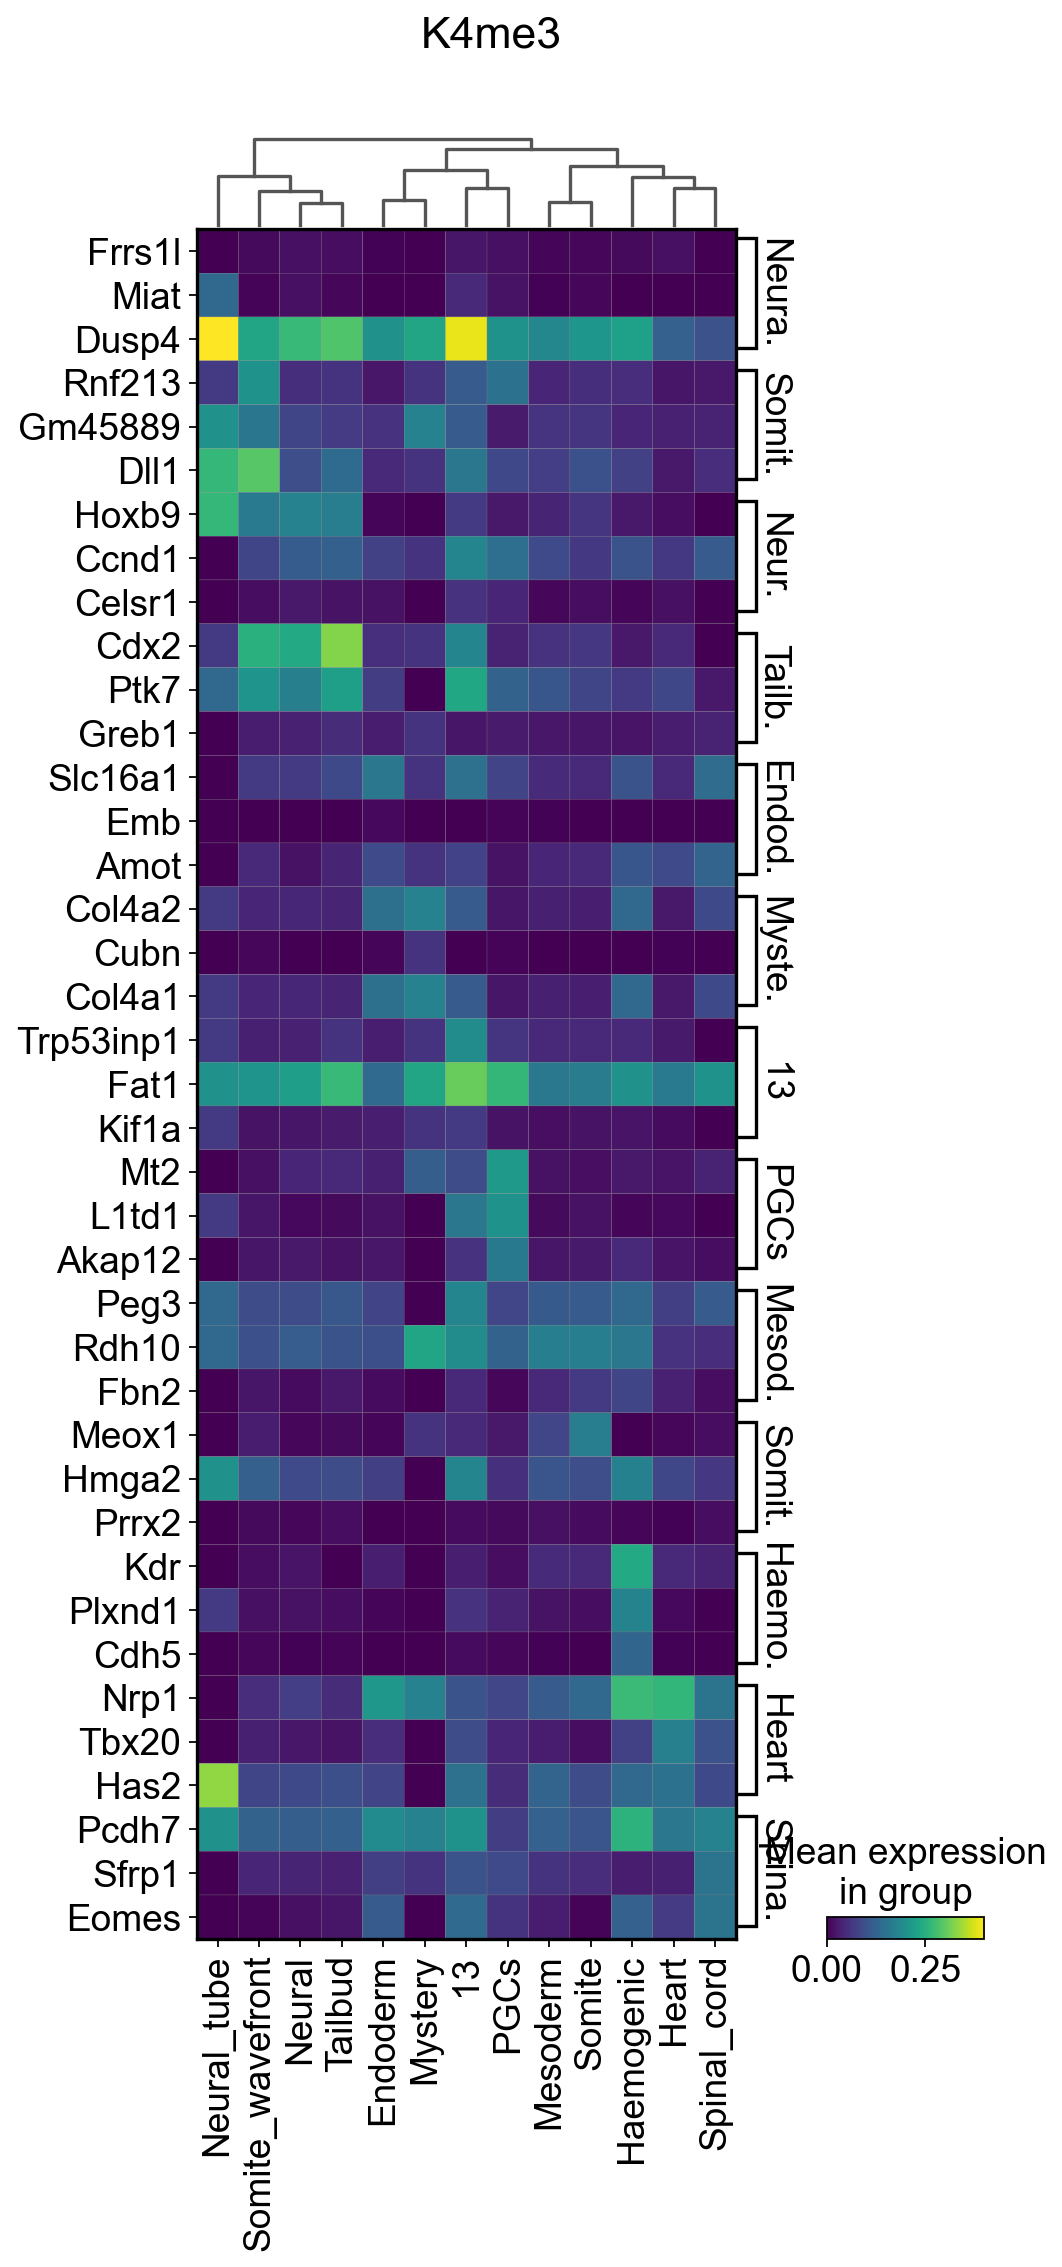

In [54]:
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=3, groupby="celltype",dendrogram=True,
                                   title = 'K4me3', swap_axes=True,
                                  use_raw=False, cmap='viridis', layer = 'k4_raw')

This can also be visualised in a violin plot instead of a heatmap.

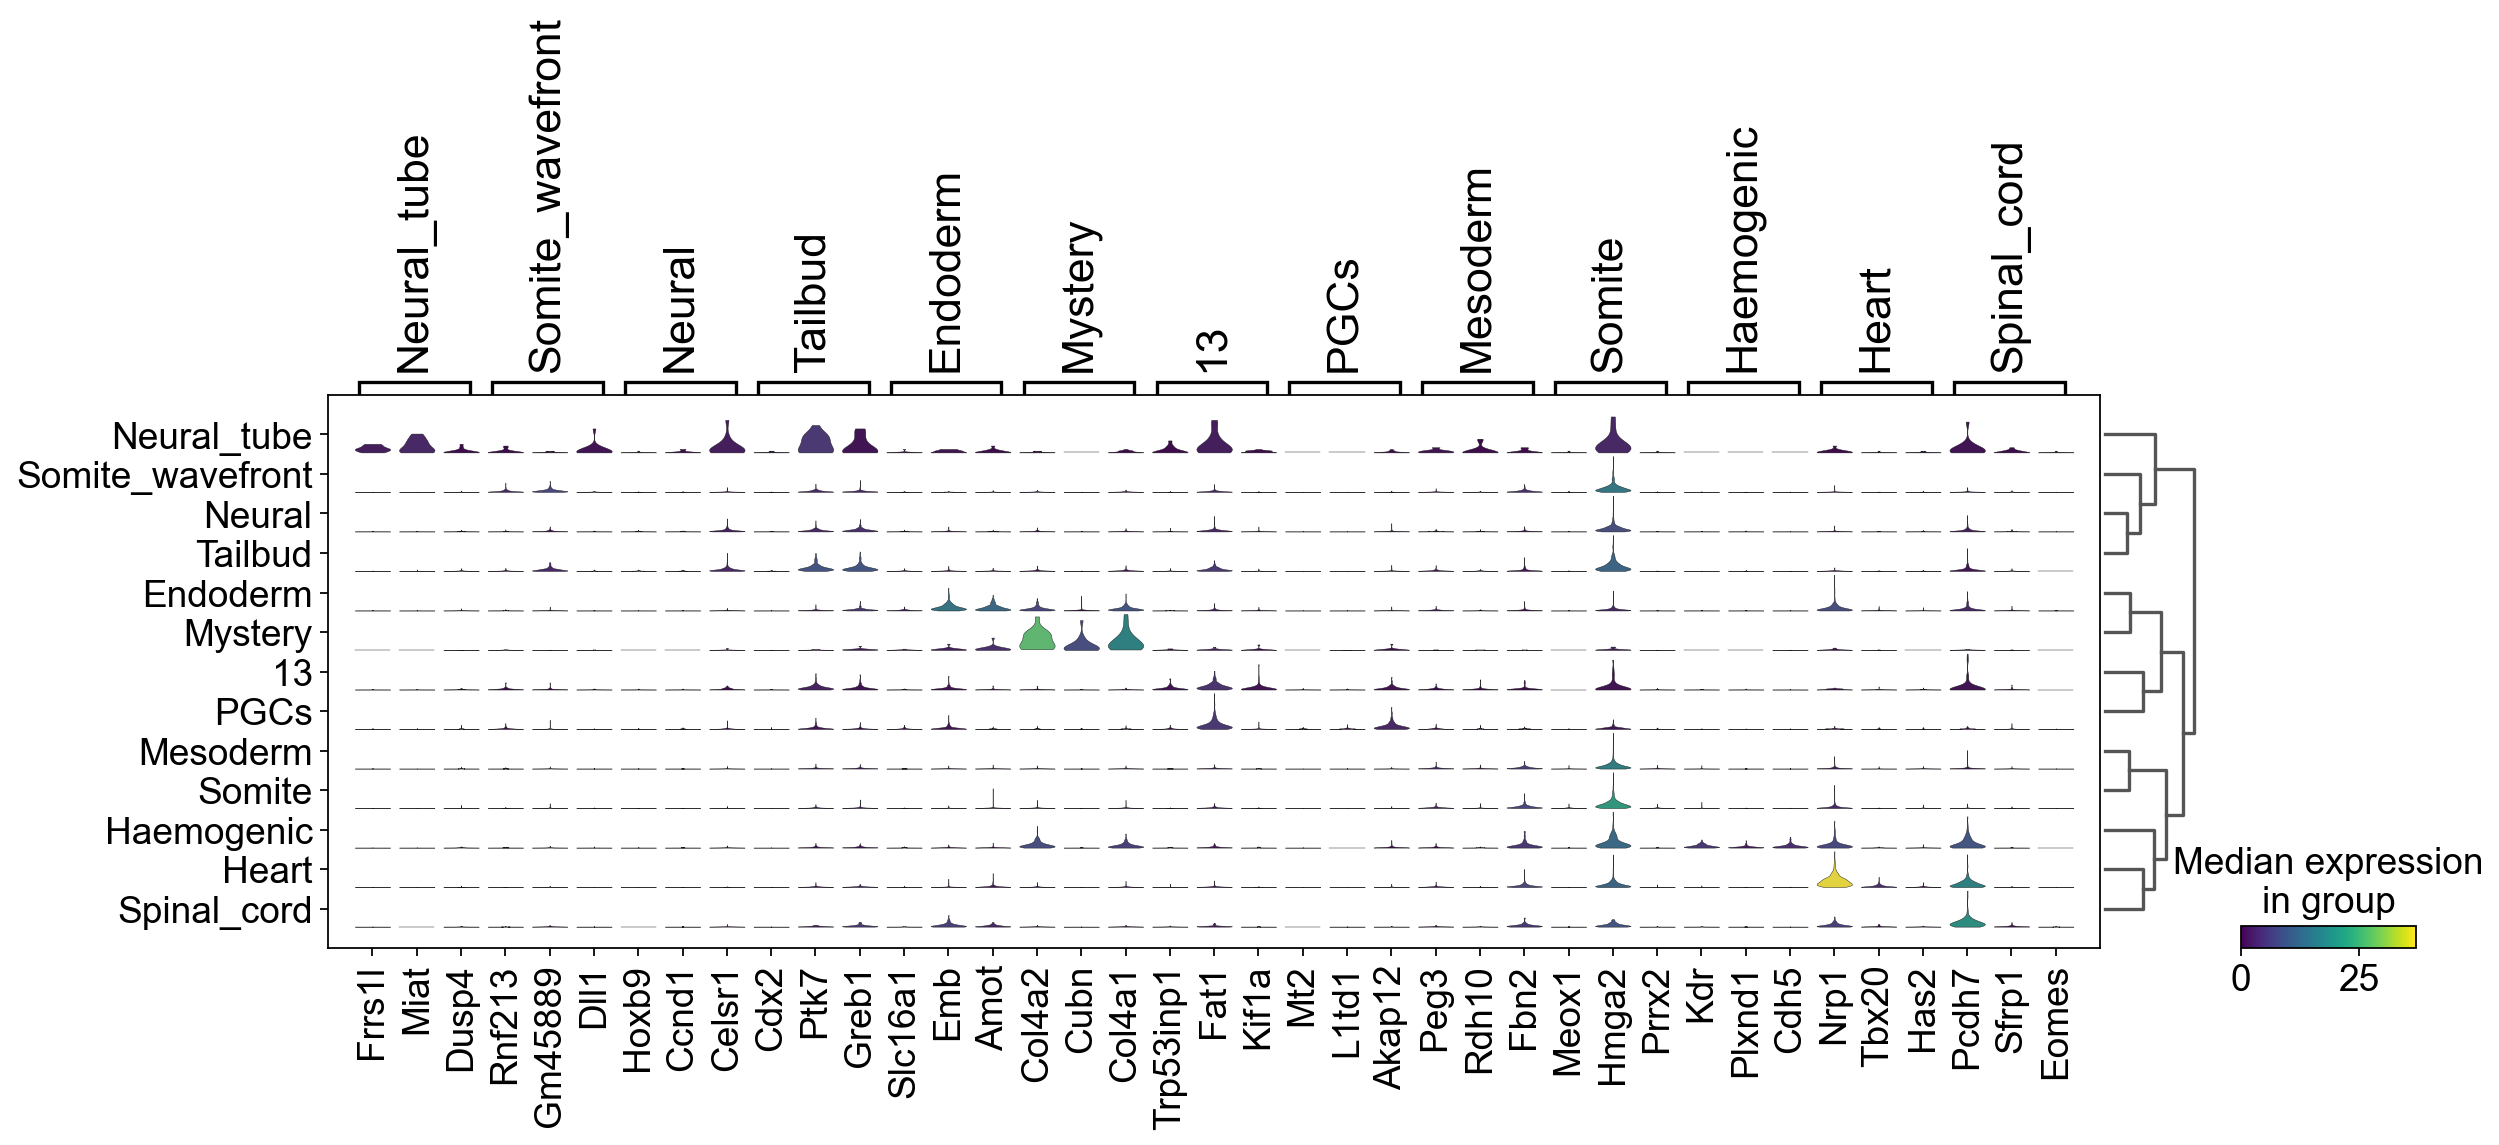

In [57]:
sc.pl.rank_genes_groups_stacked_violin(adata, groupby="celltype",n_genes=3, cmap='viridis',
                                       layer = "unspliced")

We can also make a trackplot

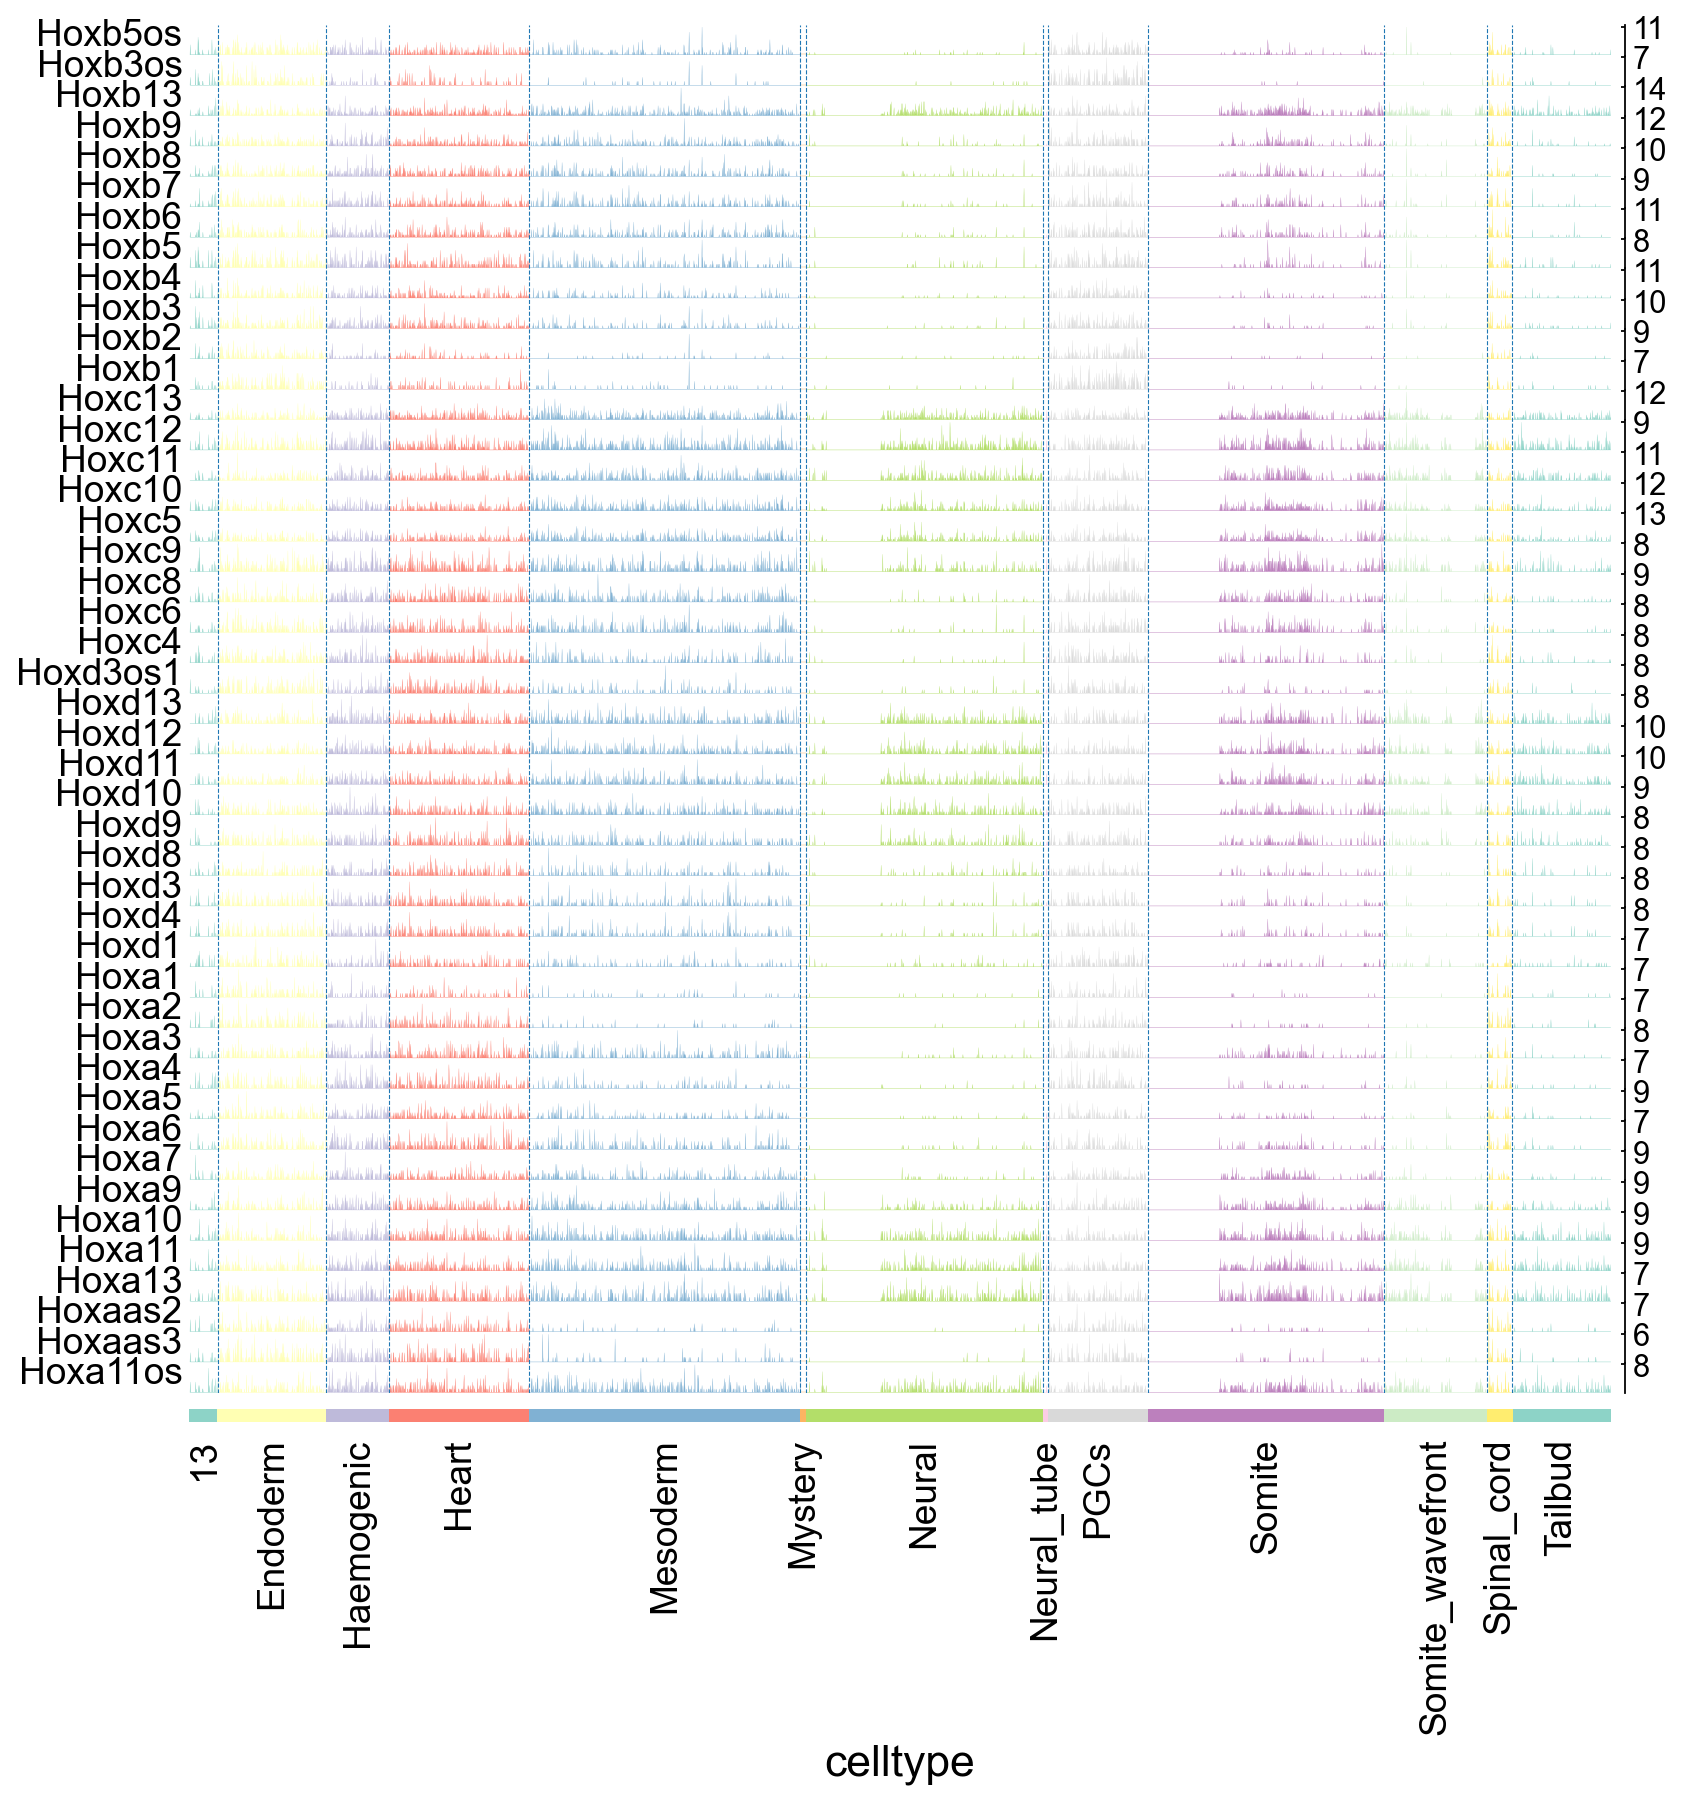

In [58]:
ax = sc.pl.tracksplot(adata,hox, groupby='celltype', layer = 'k27_raw')

And we can calculate the correlation between groups, here we also use "celltype".

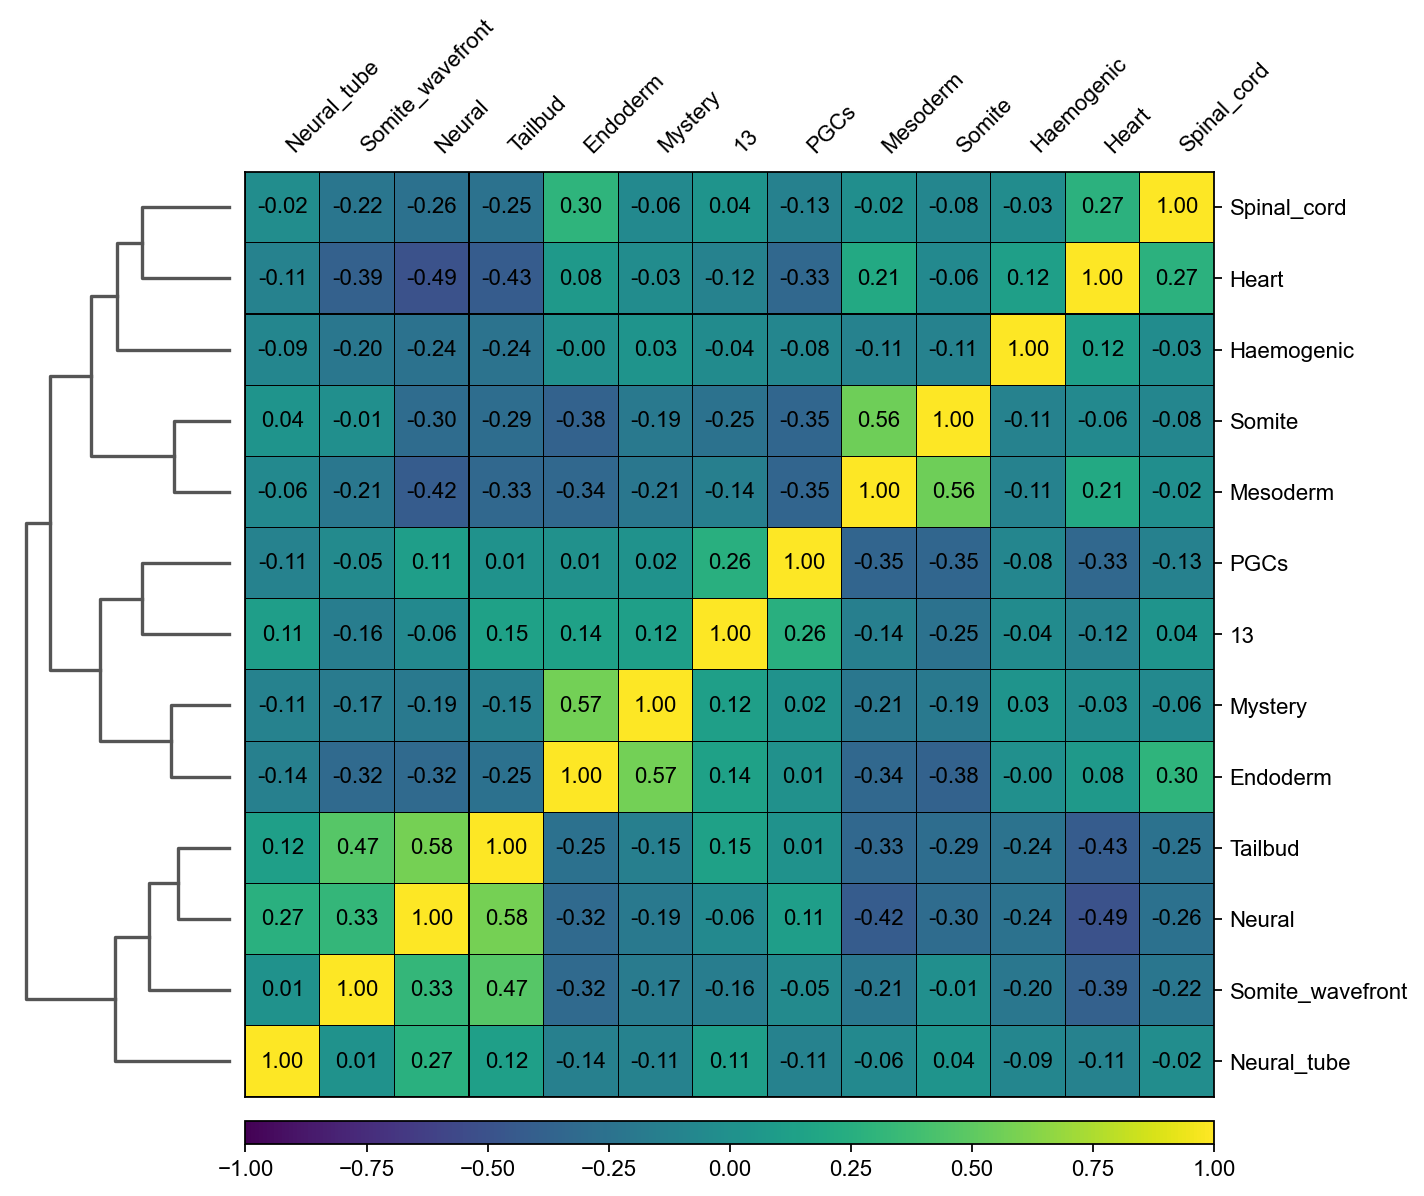

In [68]:
sc.set_figure_params(scanpy=True, fontsize=10)
ax = sc.pl.correlation_matrix(adata, 'celltype', cmap='viridis',show_correlation_numbers=True,
                             dendrogram=True)

# Some velocity
Here we look at spliced/unspliced and not necessarily chic information

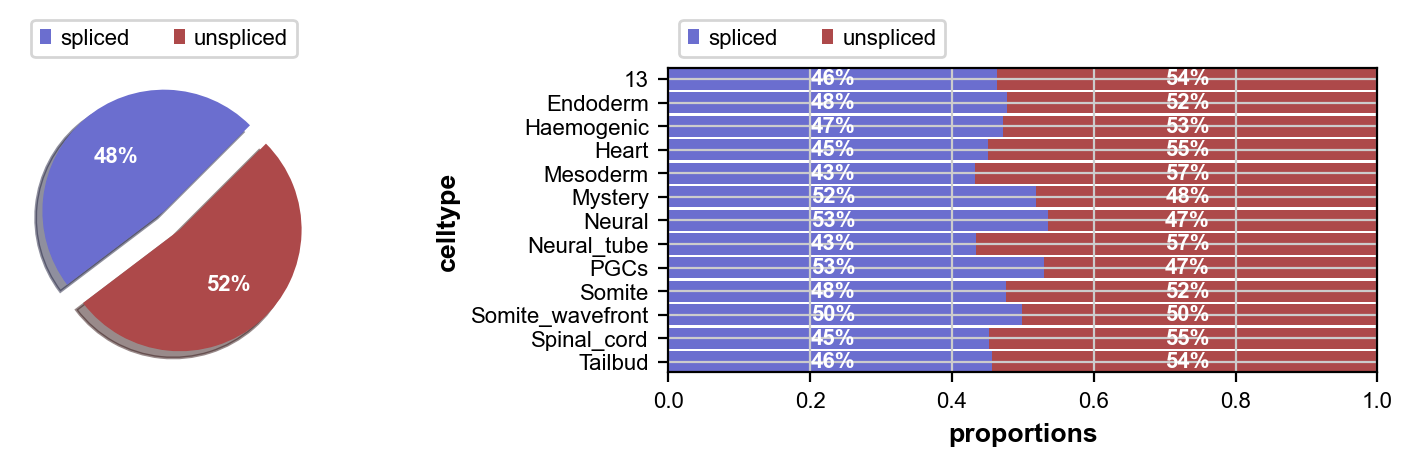

In [71]:
scv.pl.proportions(adata, groupby='celltype')

In [73]:
scv.tl.velocity(adata)

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:08) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:21) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [74]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:02:26) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


Plot velocity onto umap

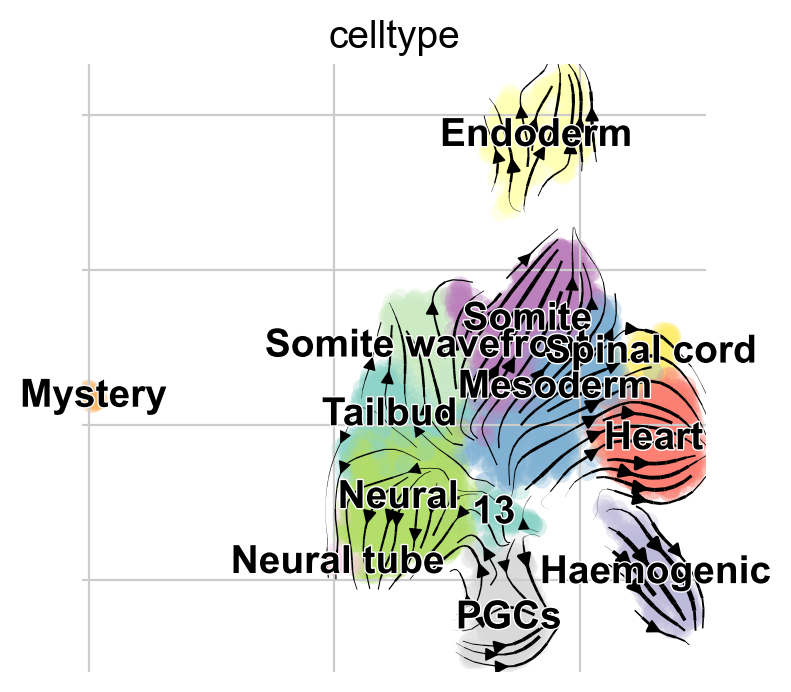

In [77]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color='celltype')

Calculate and plot latent time

recovering dynamics
    finished (1:03:00) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing terminal states
    identified 2 regions of root cells and 2 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:24) --> added 
    'latent_time', shared time (adata.obs)


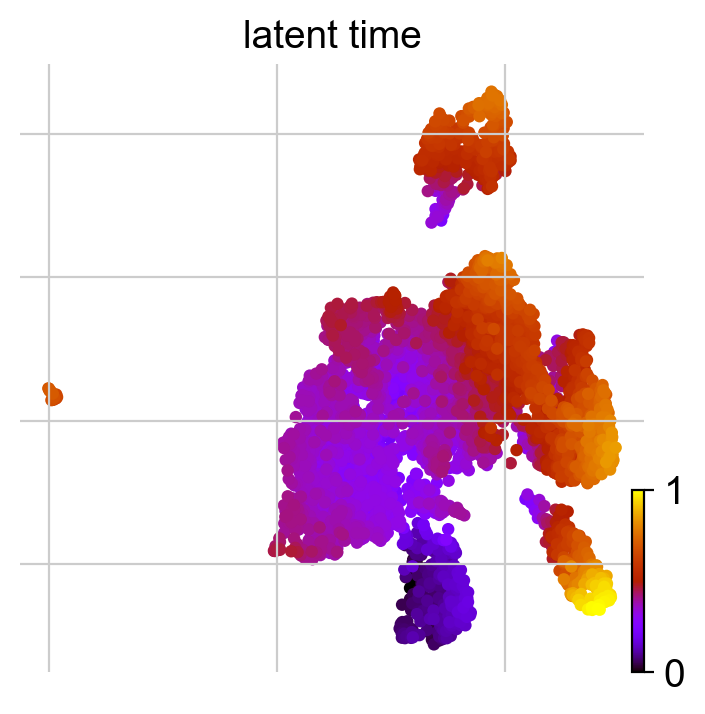

In [95]:
scv.tl.recover_dynamics(adata)
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)


Plot velocity of genes

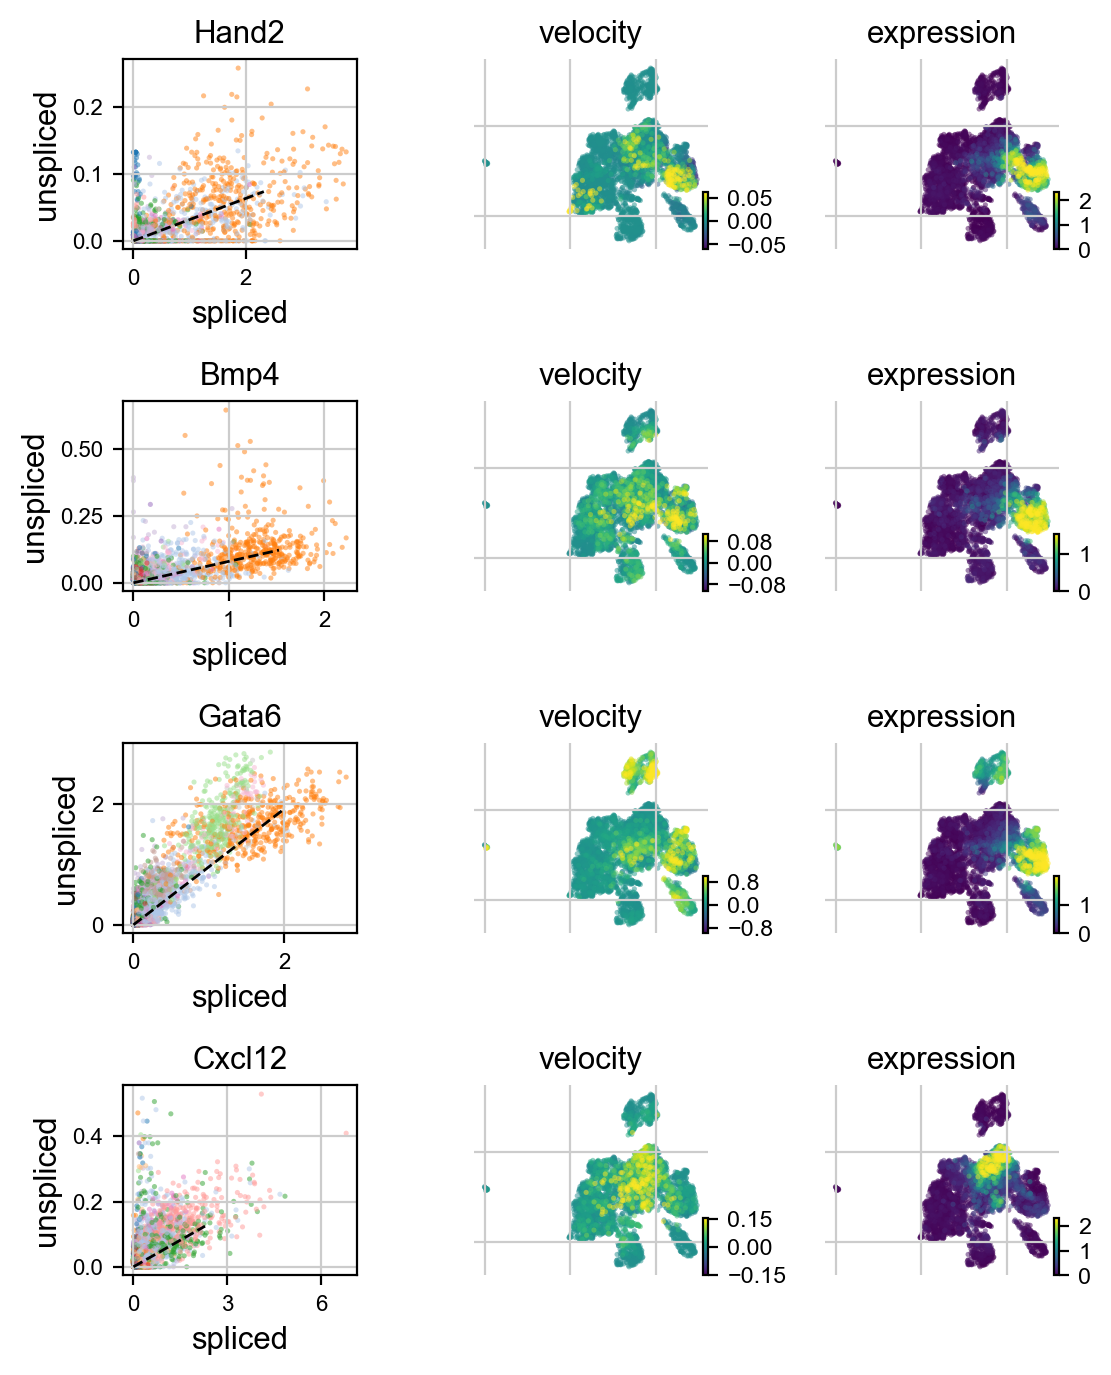

In [91]:
scv.pl.velocity(adata, ['Hand2',  'Bmp4', 'Gata6', 'Cxcl12'], cmap = 'viridis',ncols=1)

Outline a specific cluster when plotting variable genes

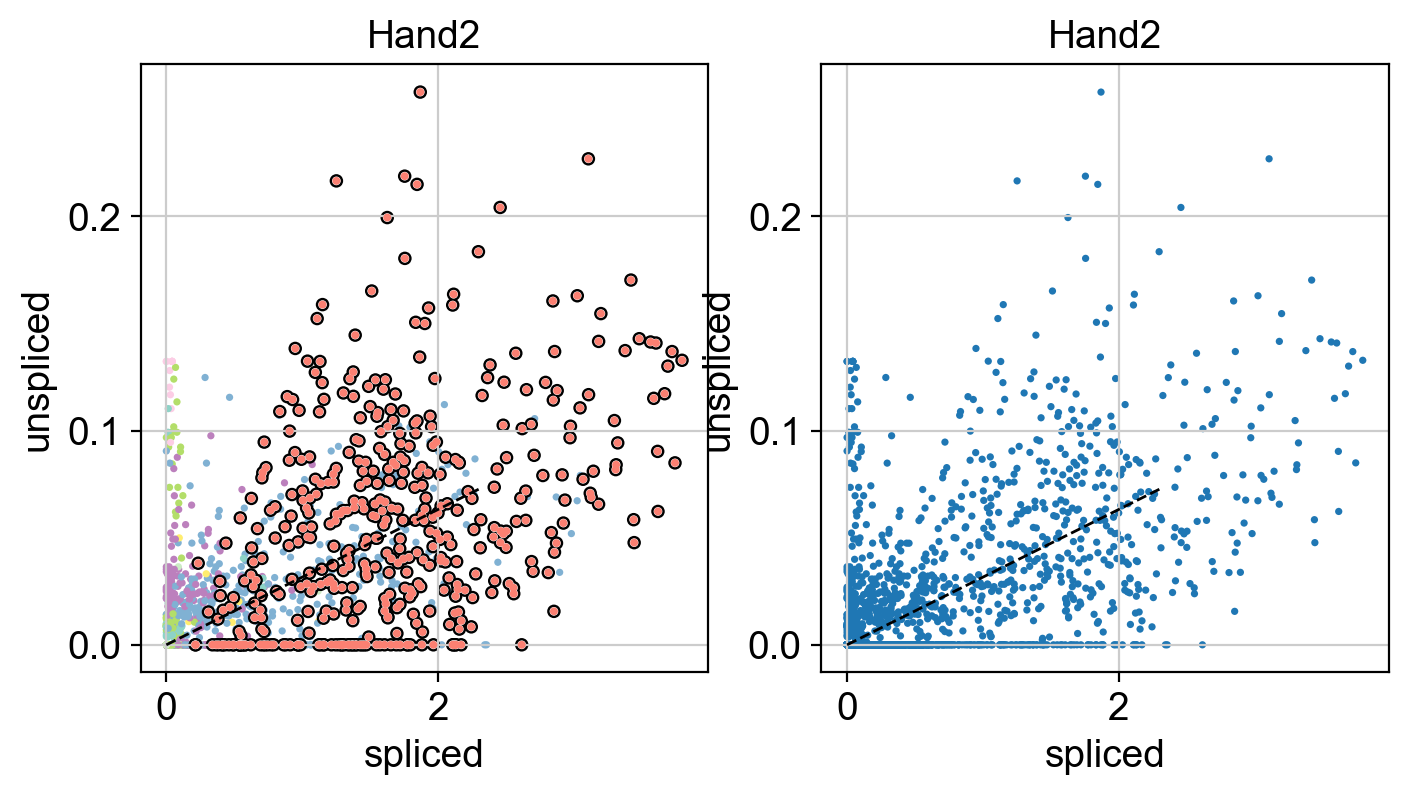

In [81]:
scv.pl.scatter(adata, 'Hand2', color=['celltype', 'day'],
               add_outline='Heart')

Various plots across latent time

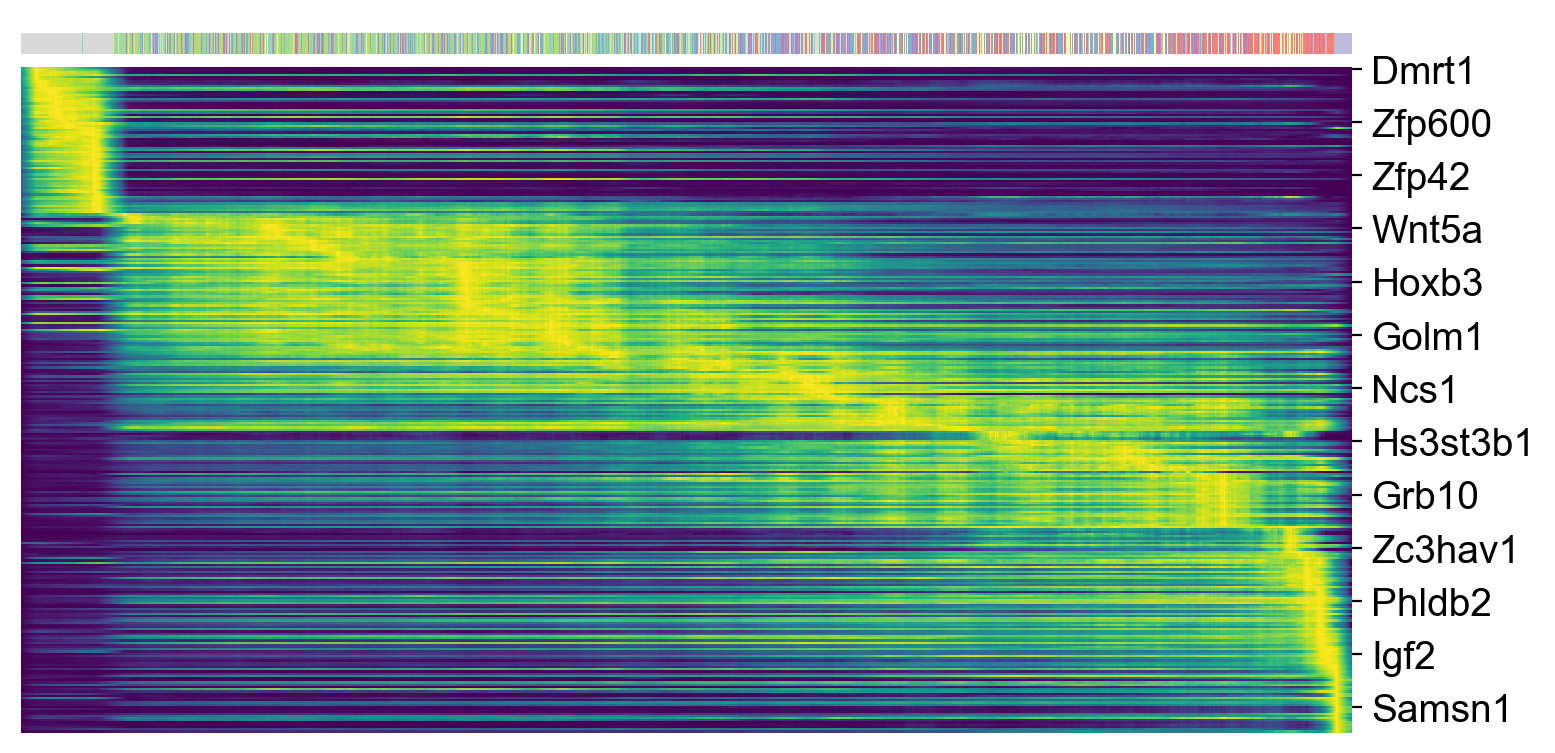

In [97]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='celltype', n_convolve=100)

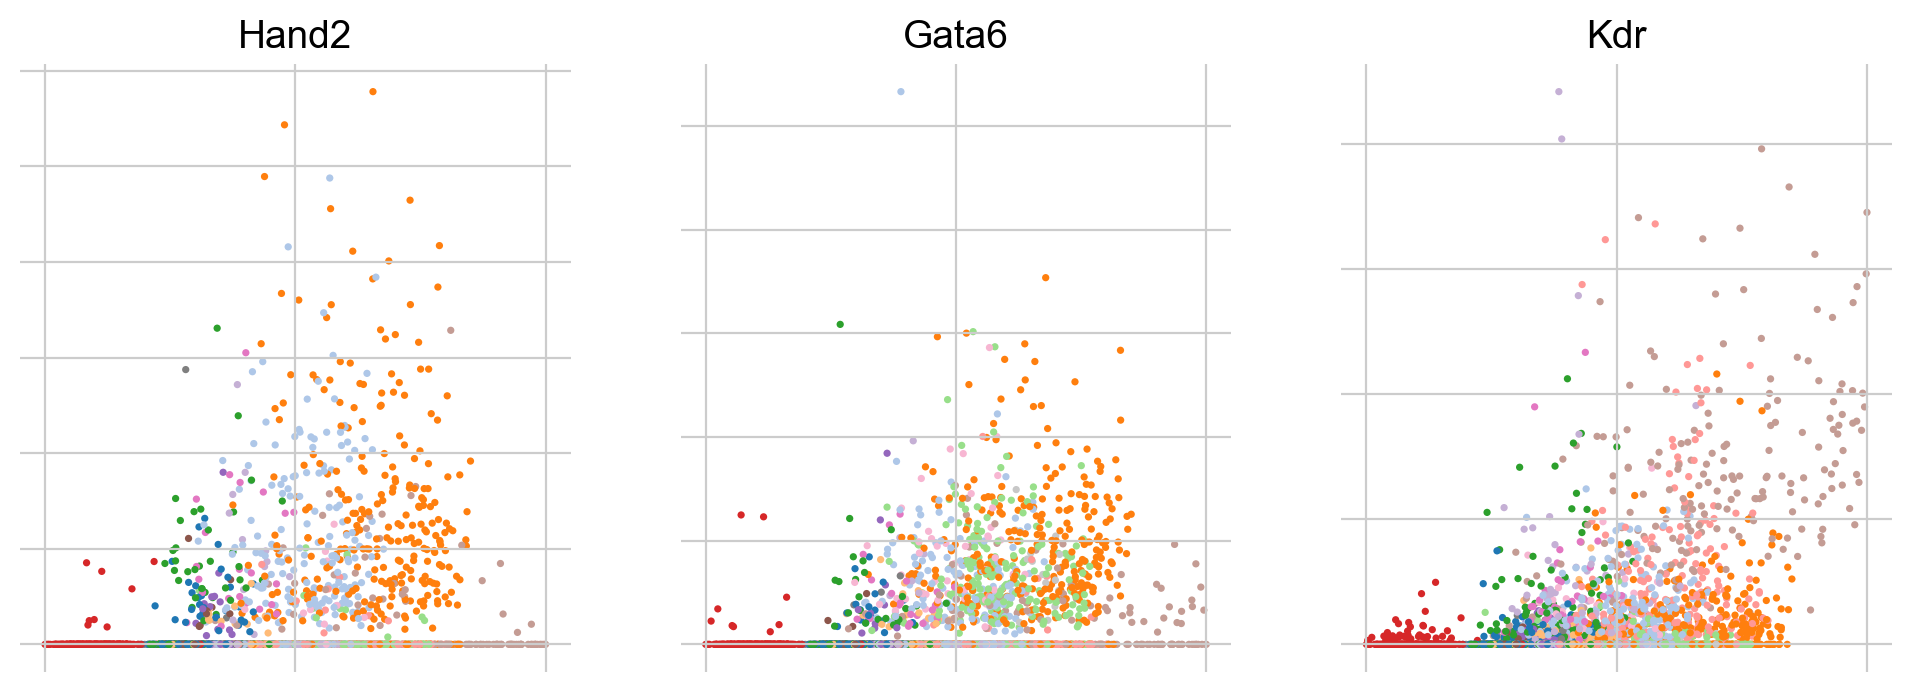

In [99]:
scv.pl.scatter(adata, x='latent_time', y=['Hand2','Gata6', 'Kdr'], frameon=False)

Track one individual cell and its trajectory across the umap

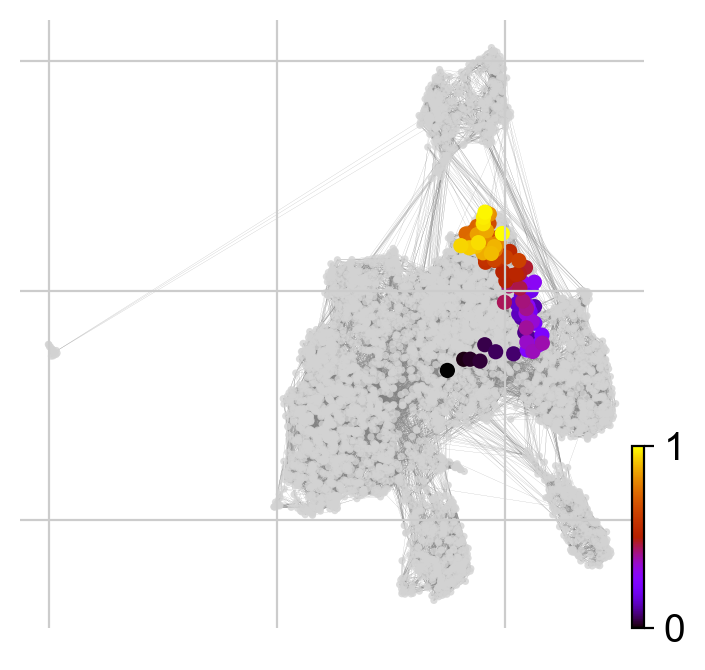

In [89]:
x, y = scv.utils.get_cell_transitions(adata, basis='umap', starting_cell=4391)
ax = scv.pl.velocity_graph(adata, c='lightgrey', edge_width=.05, show=False)
ax = scv.pl.scatter(adata, x=x, y=y, s=120, c='ascending', cmap='gnuplot', ax=ax)